# Surprise House Sale Price Prediction

> By Munirathinam Duraisamy 

 ## Problem Statment
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price.
 
The company is looking at prospective properties to buy to enter the market. Need to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

- Which variables are significant in predicting the price of a house, and

- How well those variables describe the price of a house.

- Determine the optimal value of lambda for ridge and lasso regression.

## Business Goal
Required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

> ## Steps:

> ### 1) Import Libraries
> ### 2) Data Overview
> ### 3) EDA

        - Data Cleaning 
        - Missing Data Treatment
        - Remove Irrelevant Variables wrt both data and business use cases
        - Outliers Analysis and Treatments
        - Deriving columns
        - Univariate Analysis
        - Bivariate Analysis
        - Multivariate Analysis

> ### 4) Model Preperation

        - Training and Test data split
        - Feature Scaling - StandardScaler
        - Feature Engineering & Selection using RFE and Variance Inflation factor
        - Model preperation
        - Regularization Ridge & Lasso Regression Model
        - Residual Analysis
        - Model Evaluation & Assessment
        - Prediction 
        - Conclusion

## Import Libraries

In [383]:
# Import required library
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")
import sklearn
from sklearn.linear_model import Ridge,Lasso,LinearRegression
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import LabelEncoder
import statsmodels
from statsmodels.api import OLS
from sklearn.feature_selection import RFE
import statsmodels.api as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [384]:
#Print versions of the libraries used
print('Numpy Version: {}'.format(np.__version__))
print('Pandas Version: {}'.format(pd.__version__))
print('Matplotlib Version: {}'.format(matplotlib.__version__))
print('Seaborn Version: {}'.format(sb.__version__))
print('The scikit-learn Version: {}.'.format(sklearn.__version__))
print('The statsmodels Version: {}.'.format(statsmodels.__version__))

Numpy Version: 1.20.3
Pandas Version: 1.3.4
Matplotlib Version: 3.4.3
Seaborn Version: 0.11.2
The scikit-learn Version: 0.24.2.
The statsmodels Version: 0.12.2.


## Data Overview

In [385]:
# Load the data into dataframe
sale_data = pd.read_csv("train.csv")

In [386]:
#check the shape and size
sale_data.shape

(1460, 81)

In [387]:
#Check the column data
sale_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [388]:
# Check the missing values and unique values
print ("Missing values :  ", sale_data.isnull().sum().values.sum())
print ("\nUnique values :  \n",sale_data.nunique())

Missing values :   6965

Unique values :  
 Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
Alley               2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        637
BsmtFinType2        6
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF  

We have a dataset which contains 6965 missing values <BR>
Id contains all unique values

## EDA

In [389]:
# Dropping ID columns as all are unique

sale_data = sale_data.drop(columns=['Id'])

In [390]:
# Number of rows have the all null values

print("Number of rows have null values in all columns= {} ".format(sale_data.isnull().all(axis=1).sum()))

Number of rows have null values in all columns= 0 


In [391]:
# Number of colummns have the all null values

print("Number of colummns have the all null values = {}".format(sale_data.isnull().all(axis=0).sum()))

Number of colummns have the all null values = 0


In [392]:
# dropping columns which have null values in all the rows

sale_data.dropna(axis=1, how='all',inplace=True)

In [393]:
# Check Duplicate Rows

sale_data[sale_data.duplicated()]


Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

#### Analyse and Treat Missing values

In [394]:
#Print all columns in descending order based on its % of missing values
pd.options.display.max_rows = None
round(100 * sale_data.isnull().sum()/len(sale_data.index),2).sort_values(ascending=False)

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
LotFrontage      17.74
GarageYrBlt       5.55
GarageCond        5.55
GarageType        5.55
GarageFinish      5.55
GarageQual        5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtCond          2.53
BsmtQual          2.53
BsmtFinType1      2.53
MasVnrArea        0.55
MasVnrType        0.55
Electrical        0.07
MSSubClass        0.00
Fireplaces        0.00
Functional        0.00
KitchenQual       0.00
KitchenAbvGr      0.00
BedroomAbvGr      0.00
HalfBath          0.00
FullBath          0.00
BsmtHalfBath      0.00
TotRmsAbvGrd      0.00
GarageCars        0.00
GrLivArea         0.00
GarageArea        0.00
PavedDrive        0.00
WoodDeckSF        0.00
OpenPorchSF       0.00
EnclosedPorch     0.00
3SsnPorch         0.00
ScreenPorch       0.00
PoolArea          0.00
MiscVal           0.00
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleConditi

In [395]:
#Dropping below attributes as it has respective % of missing values and it will not be significant for analysis
#PoolQC           99.52
#MiscFeature      96.30
#Alley            93.77
#Fence            80.75
#FireplaceQu      47.26
#LotFrontage      17.74


sale_data = sale_data.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage'],axis=1)

#### Analyse other variables with missing values

In [396]:
#Categorize other missing variables
miss_catg_var=['GarageCond', 'GarageType','GarageFinish','GarageQual', 'BsmtExposure', 'BsmtFinType2', 'BsmtCond','BsmtQual', 'BsmtFinType1', 'MasVnrType','Electrical']

miss_cont_var=['GarageYrBlt','MasVnrArea']

In [397]:
# Continuous variables: 'MasVnrArea','GarageYrBlt' - check is there any outliers in these data

for i  in miss_cont_var:
    print("Variable Name:",i)
    print(sale_data[i].describe())
    print("----------------------------------------------------- \n")
    Q3,Q1 = np.percentile(sale_data[i],[75,25])
    IQR = Q3-Q1
    lower_bound = Q1-1.5*IQR
    upper_bound = Q3+1.5*IQR
    print("Values below lower bound",sale_data[i][sale_data[i]<=lower_bound].values)
    print("Values above upper bound",sale_data[i][sale_data[i]>=upper_bound].values)

Variable Name: GarageYrBlt
count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64
----------------------------------------------------- 

Values below lower bound []
Values above upper bound []
Variable Name: MasVnrArea
count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64
----------------------------------------------------- 

Values below lower bound []
Values above upper bound []


In [398]:
#Since 'MasVnrArea','GarageYrBlt' variables has outliers, replacing the missing values with median for both variables

sale_data['MasVnrArea'] = sale_data['MasVnrArea'].fillna(sale_data['MasVnrArea'].median())
sale_data['GarageYrBlt'] = sale_data['GarageYrBlt'].fillna(sale_data['GarageYrBlt'].median())

In [399]:
#We will analyze all categorical variables data; Finding value count for all variables
for i  in miss_catg_var:
    print("Variable Name:",i)
    print(sale_data[i].value_counts())
    print('-----------------------------------------------')

Variable Name: GarageCond
TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64
-----------------------------------------------
Variable Name: GarageType
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64
-----------------------------------------------
Variable Name: GarageFinish
Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64
-----------------------------------------------
Variable Name: GarageQual
TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64
-----------------------------------------------
Variable Name: BsmtExposure
No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64
-----------------------------------------------
Variable Name: BsmtFinType2
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64
-----------------------------------------------
Variable Name

In [400]:
#Replace all missing values in categoriacal variables with its respective mode values
for i  in miss_catg_var:
    sale_data[i] = sale_data[i].fillna(sale_data[i].mode()[0])

In [401]:
#Recheck on its % of missing values
pd.options.display.max_rows = None
round(100 * sale_data.isnull().sum()/len(sale_data.index),2).sort_values(ascending=False)

MSSubClass       0.0
GarageYrBlt      0.0
Fireplaces       0.0
Functional       0.0
TotRmsAbvGrd     0.0
KitchenQual      0.0
KitchenAbvGr     0.0
BedroomAbvGr     0.0
HalfBath         0.0
FullBath         0.0
BsmtHalfBath     0.0
BsmtFullBath     0.0
GrLivArea        0.0
LowQualFinSF     0.0
2ndFlrSF         0.0
1stFlrSF         0.0
Electrical       0.0
GarageType       0.0
GarageFinish     0.0
MSZoning         0.0
GarageCars       0.0
SaleCondition    0.0
SaleType         0.0
YrSold           0.0
MoSold           0.0
MiscVal          0.0
PoolArea         0.0
ScreenPorch      0.0
3SsnPorch        0.0
EnclosedPorch    0.0
OpenPorchSF      0.0
WoodDeckSF       0.0
PavedDrive       0.0
GarageCond       0.0
GarageQual       0.0
GarageArea       0.0
CentralAir       0.0
HeatingQC        0.0
Heating          0.0
TotalBsmtSF      0.0
YearBuilt        0.0
OverallCond      0.0
OverallQual      0.0
HouseStyle       0.0
BldgType         0.0
Condition2       0.0
Condition1       0.0
Neighborhood 

##### All missing values are analysed and treated accordingly

#### Deriving Columns

In [402]:
# As we are going to use age, converting years columns to age Columns and dropping the orginal columns

sale_data['YearBuilt_Age'] = sale_data['YearBuilt'].max() - sale_data['YearBuilt']
sale_data['YearRemodAdd_Age'] = sale_data['YearRemodAdd'].max() - sale_data['YearRemodAdd']
sale_data['YrSold_Age'] = sale_data['YrSold'].max() - sale_data['YrSold']
sale_data['GarageYrBlt_Age'] = sale_data['GarageYrBlt'].max() - sale_data['GarageYrBlt']

sale_data.drop(['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'], axis=1, inplace = True)

In [403]:
sale_data[['YearBuilt_Age','YearRemodAdd_Age','YrSold_Age','GarageYrBlt_Age']].head()

YearBuilt_Age  YearRemodAdd_Age  YrSold_Age  GarageYrBlt_Age
0              7                 7           2              7.0
1             34                34           3             34.0
2              9                 8           2              9.0
3             95                40           4             12.0
4             10                10           2             10.0

In [404]:
# A below variables are related to object (type or ratings), converting the same to Object Type
cont_obj = ['MSSubClass', 'OverallQual', 'OverallCond']
for i in cont_obj:
        sale_data[i] = sale_data[i].astype('object')


In [405]:
# Print dataframe info

print ("Rows     : " ,sale_data.shape[0])
print ("Columns  : " ,sale_data.shape[1])
print ("\nFeatures : \n" ,sale_data.columns.tolist())
print ("Missing values :  ", sale_data.isnull().sum().values.sum())

Rows     :  1460
Columns  :  74

Features : 
 ['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'SaleType', 'SaleCondition', '

In [406]:
#Analysing more unique value variables
sale_data.nunique().sort_values(ascending=False)

LotArea             1073
GrLivArea            861
BsmtUnfSF            780
1stFlrSF             753
TotalBsmtSF          721
SalePrice            663
BsmtFinSF1           637
GarageArea           441
2ndFlrSF             417
MasVnrArea           327
WoodDeckSF           274
OpenPorchSF          202
BsmtFinSF2           144
EnclosedPorch        120
YearBuilt_Age        112
GarageYrBlt_Age       97
ScreenPorch           76
YearRemodAdd_Age      61
Neighborhood          25
LowQualFinSF          24
MiscVal               21
3SsnPorch             20
Exterior2nd           16
MSSubClass            15
Exterior1st           15
TotRmsAbvGrd          12
MoSold                12
OverallQual           10
OverallCond            9
SaleType               9
Condition1             9
PoolArea               8
Condition2             8
HouseStyle             8
BedroomAbvGr           8
RoofMatl               8
Functional             7
SaleCondition          6
GarageType             6
Foundation             6


##### Only Area and SF related information has high unique values which is expected

In [407]:
# Removing columns which have more than 85% of unique values as it will not be significant
dropcolumn = []
value = len(sale_data.index)*.85
for i in sale_data.columns:
    if sale_data[i].value_counts().max()>= value:
        sale_data.drop(columns=[i], inplace=True)
        dropcolumn.append(i)
print('Number of Columns removed : ' , len(dropcolumn))
print('List of Columns removed : ' , dropcolumn)

Number of Columns removed :  27
List of Columns removed :  ['Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'RoofMatl', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'BsmtFinSF2', 'Heating', 'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SaleType']


In [408]:
sale_data.describe()

LotArea   MasVnrArea   BsmtFinSF1    BsmtUnfSF  TotalBsmtSF  \
count    1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean    10516.828082   103.117123   443.639726   567.240411  1057.429452   
std      9981.264932   180.731373   456.098091   441.866955   438.705324   
min      1300.000000     0.000000     0.000000     0.000000     0.000000   
25%      7553.500000     0.000000     0.000000   223.000000   795.750000   
50%      9478.500000     0.000000   383.500000   477.500000   991.500000   
75%     11601.500000   164.250000   712.250000   808.000000  1298.250000   
max    215245.000000  1600.000000  5644.000000  2336.000000  6110.000000   

          1stFlrSF     2ndFlrSF    GrLivArea  BsmtFullBath     FullBath  \
count  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   
mean   1162.626712   346.992466  1515.463699      0.425342     1.565068   
std     386.587738   436.528436   525.480383      0.518911     0.550916   
min     334.000000     0.000000   334.000000      0.000000     0.000000   
25%     882.000000     0.000000  1129.500000      0.000000     1.000000   
50%    1087.000000     0.000000  1464.000000      0.000000     2.000000   
75%    1391.250000   728.000000  1776.750000      1.000000     2.000000   
max    4692.000000  2065.000000  5642.000000      3.000000     3.000000   

          HalfBath  BedroomAbvGr  TotRmsAbvGrd   Fireplaces   GarageCars  \
count  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   
mean      0.382877      2.866438      6.517808     0.613014     1.767123   
std       0.502885      0.815778      1.625393     0.644666     0.747315   
min       0.000000      0.000000      2.000000     0.000000     0.000000   
25%       0.000000      2.000000      5.000000     0.000000     1.000000   
50%       0.000000      3.000000      6.000000     1.000000     2.000000   
75%       1.000000      3.000000      7.000000     1.000000     2.000000   
max       2.000000      8.000000     14.000000     3.000000     4.000000   

        GarageArea   WoodDeckSF  OpenPorchSF       MoSold      SalePrice  \
count  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000   
mean    472.980137    94.244521    46.660274     6.321918  180921.195890   
std     213.804841   125.338794    66.256028     2.703626   79442.502883   
min       0.000000     0.000000     0.000000     1.000000   34900.000000   
25%     334.500000     0.000000     0.000000     5.000000  129975.000000   
50%     480.000000     0.000000    25.000000     6.000000  163000.000000   
75%     576.000000   168.000000    68.000000     8.000000  214000.000000   
max    1418.000000   857.000000   547.000000    12.000000  755000.000000   

       YearBuilt_Age  YearRemodAdd_Age   YrSold_Age  GarageYrBlt_Age  
count    1460.000000       1460.000000  1460.000000      1460.000000  
mean       38.732192         25.134247     2.184247        31.410959  
std        30.202904         20.645407     1.328095        23.997022  
min         0.000000          0.000000     0.000000         0.000000  
25%        10.000000          6.000000     1.000000         9.000000  
50%        37.000000         16.000000     2.000000        30.000000  
75%        56.000000         43.000000     3.000000        48.000000  
max       138.000000         60.000000     4.000000       110.000000

Variable Name: LotArea


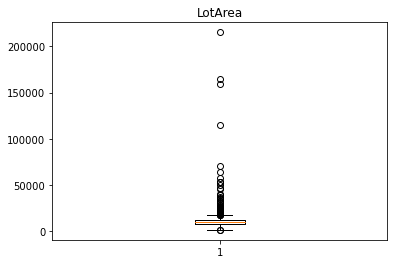

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64
----------------------------------------------------- 

Values below lower bound [1300 1477]
Values above upper bound [ 50271  19900  21000  21453  19378  31770  22950  25419 159000  19296
  39104  19138  18386 215245 164660  20431  18800  53107  34650  22420
  21750  70761  53227  40094  32668  21872  21780  25095  46589  20896
  18450  21535  26178 115149  21695  53504  21384  28698  45600  17920
  25286  27650  24090  25000  21286  21750  29959  18000  23257  17755
  35760  18030  35133  32463  18890  24682  23595  17871  36500  63887
  20781  25339  57200  20544  19690  21930  26142]
Variable Name: MasVnrArea


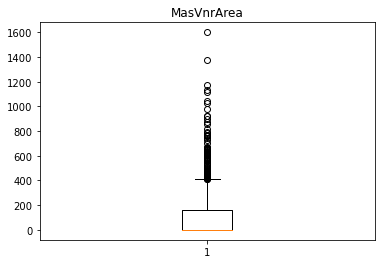

count    1460.000000
mean      103.117123
std       180.731373
min         0.000000
25%         0.000000
50%         0.000000
75%       164.250000
max      1600.000000
Name: MasVnrArea, dtype: float64
----------------------------------------------------- 

Values below lower bound []
Values above upper bound [ 640.  650.  412.  456. 1031.  573. 1115.  576.  443.  468.  600.  768.
  480. 1129.  436.  456.  664.  653.  491.  748.  456.  922.  506.  604.
  472.  481. 1600.  616.  870.  530.  500.  510.  650.  432.  473.  772.
  435.  562.  921.  762.  594.  479.  584.  420.  459.  452.  513.  472.
  660.  528.  464. 1170.  630.  466.  651.  442.  894.  513.  673.  603.
  860.  424. 1047.  442.  816.  415.  760.  541.  423.  424.  975.  450.
  423.  571.  480.  425.  660. 1378.  456.  425.  420.  766.  554.  632.
  567.  451.  621.  788.  796.  428.  564.  579.  705.  731.  420.  448.
  426.  438.]
Variable Name: BsmtFinSF1


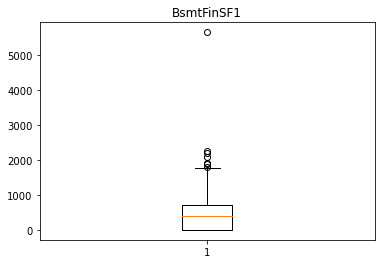

count    1460.000000
mean      443.639726
std       456.098091
min         0.000000
25%         0.000000
50%       383.500000
75%       712.250000
max      5644.000000
Name: BsmtFinSF1, dtype: float64
----------------------------------------------------- 

Values below lower bound []
Values above upper bound [1810 1880 1904 2260 2188 2096 5644]
Variable Name: BsmtUnfSF


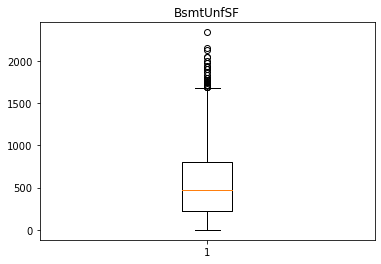

count    1460.000000
mean      567.240411
std       441.866955
min         0.000000
25%       223.000000
50%       477.500000
75%       808.000000
max      2336.000000
Name: BsmtUnfSF, dtype: float64
----------------------------------------------------- 

Values below lower bound []
Values above upper bound [1777 1768 1907 1686 2336 1694 2121 1869 2153 1969 1709 2042 1774 2046
 1836 1935 1926 1734 1800 1753 1905 1800 1710 1752 1694 1689 2002 1753
 1795]
Variable Name: TotalBsmtSF


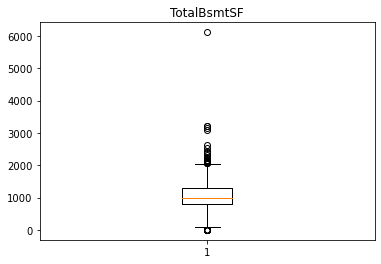

count    1460.000000
mean     1057.429452
std       438.705324
min         0.000000
25%       795.750000
50%       991.500000
75%      1298.250000
max      6110.000000
Name: TotalBsmtSF, dtype: float64
----------------------------------------------------- 

Values below lower bound [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Values above upper bound [2223 2216 2392 2121 2136 3206 3094 2153 3200 3138 2109 2077 2444 2078
 2217 2330 2524 2396 2158 2136 2076 2110 6110 2633]
Variable Name: 1stFlrSF


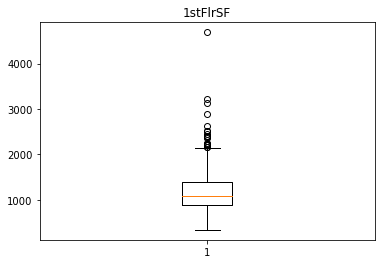

count    1460.000000
mean     1162.626712
std       386.587738
min       334.000000
25%       882.000000
50%      1087.000000
75%      1391.250000
max      4692.000000
Name: 1stFlrSF, dtype: float64
----------------------------------------------------- 

Values below lower bound []
Values above upper bound [2207 2223 2259 2158 2234 2392 2402 3228 3138 2515 2444 2217 2364 2898
 2524 2411 2196 4692 2156 2633]
Variable Name: 2ndFlrSF


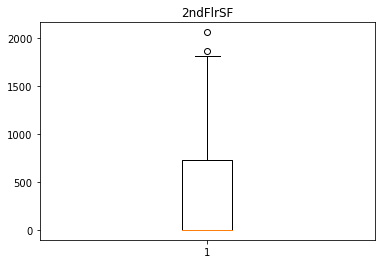

count    1460.000000
mean      346.992466
std       436.528436
min         0.000000
25%         0.000000
50%         0.000000
75%       728.000000
max      2065.000000
Name: 2ndFlrSF, dtype: float64
----------------------------------------------------- 

Values below lower bound []
Values above upper bound [1872 2065]
Variable Name: GrLivArea


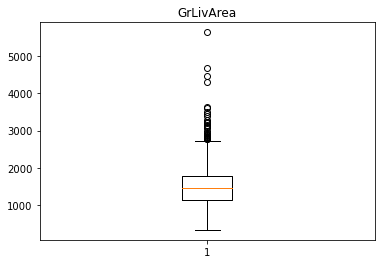

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64
----------------------------------------------------- 

Values below lower bound []
Values above upper bound [2945 3222 3608 3112 2794 3493 2978 3228 4676 2775 3194 3395 4316 3279
 3140 2822 2872 2898 3082 2868 2828 3627 3086 2872 4476 3447 5642 2810
 2792 3238 2784]
Variable Name: GarageArea


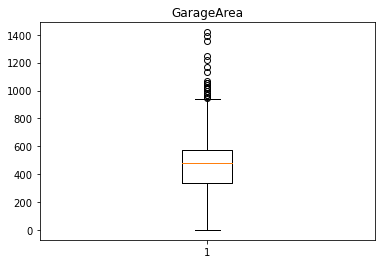

count    1460.000000
mean      472.980137
std       213.804841
min         0.000000
25%       334.500000
50%       480.000000
75%       576.000000
max      1418.000000
Name: GarageArea, dtype: float64
----------------------------------------------------- 

Values below lower bound []
Values above upper bound [1166  968 1053 1025  947 1390 1134  983 1020 1220 1248 1043 1052  995
 1356 1052  954 1014 1418  968 1069]
Variable Name: WoodDeckSF


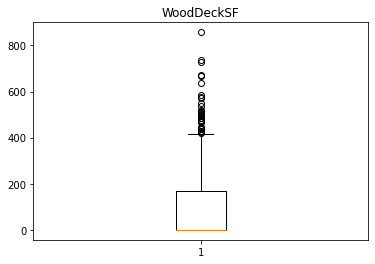

count    1460.000000
mean       94.244521
std       125.338794
min         0.000000
25%         0.000000
50%         0.000000
75%       168.000000
max       857.000000
Name: WoodDeckSF, dtype: float64
----------------------------------------------------- 

Values below lower bound []
Values above upper bound [857 576 476 574 441 468 670 495 536 519 466 517 426 503 486 486 511 421
 550 509 474 728 436 431 448 439 635 500 668 586 431 736]
Variable Name: OpenPorchSF


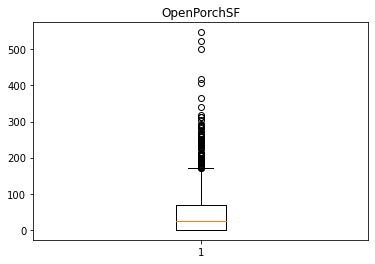

count    1460.000000
mean       46.660274
std        66.256028
min         0.000000
25%         0.000000
50%        25.000000
75%        68.000000
max       547.000000
Name: OpenPorchSF, dtype: float64
----------------------------------------------------- 

Values below lower bound []
Values above upper bound [204 213 258 199 234 184 205 228 238 260 198 172 208 228 184 250 175 195
 214 231 192 187 176 523 285 406 182 502 274 172 243 235 312 267 265 288
 341 204 174 247 291 170 312 418 240 364 188 207 234 192 191 252 189 282
 224 319 244 185 200 180 263 304 234 240 192 229 211 198 287 292 207 241
 547 211 184 262 170 210 236]


In [409]:
# Analysing area and SF related variables
area_sf_cols = ['LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF']
for i  in area_sf_cols:
    print("Variable Name:",i)
    plt.title(i)
    plt.boxplot(sale_data[i])
    plt.show()
    print(sale_data[i].describe())
    print("----------------------------------------------------- \n")
    Q3,Q1 = np.percentile(sale_data[i],[75,25])
    IQR = Q3-Q1
    lower_bound = Q1-1.5*IQR
    upper_bound = Q3+1.5*IQR
    print("Values below lower bound",sale_data[i][sale_data[i]<=lower_bound].values)
    print("Values above upper bound",sale_data[i][sale_data[i]>=upper_bound].values)

##### we can see outliers in all the variables listed in area_sf_cols. Hence, repalcing the outlier values with upper and lower bound values based on respective values

In [410]:
for i in area_sf_cols:
    Q3,Q1 = np.percentile(sale_data[i],[75,25])
    IQR = Q3-Q1
    lower_bound = Q1-1.5*IQR
    upper_bound = Q3+1.5*IQR
    sale_data[i][sale_data[i]<=lower_bound] = lower_bound
    sale_data[i][sale_data[i]>=upper_bound] = upper_bound


print("After outliers treatment\n\n",sale_data[area_sf_cols].describe())

After outliers treatment

             LotArea   MasVnrArea   BsmtFinSF1    BsmtUnfSF  TotalBsmtSF  \
count   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean    9647.388014    89.406336   439.997517   563.777740  1050.254795   
std     3594.356399   134.017553   433.219435   431.710214   397.937878   
min     1481.500000     0.000000     0.000000     0.000000    42.000000   
25%     7553.500000     0.000000     0.000000   223.000000   795.750000   
50%     9478.500000     0.000000   383.500000   477.500000   991.500000   
75%    11601.500000   164.250000   712.250000   808.000000  1298.250000   
max    17673.500000   410.625000  1780.625000  1685.500000  2052.000000   

          1stFlrSF     2ndFlrSF    GrLivArea   GarageArea   WoodDeckSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1157.018151   346.789041  1503.735873   470.670719    91.806849   
std     362.583002   435.791621   481.375641   207.105729   116.658120   
m

In [411]:
sale_data.shape

(1460, 47)

<AxesSubplot:>

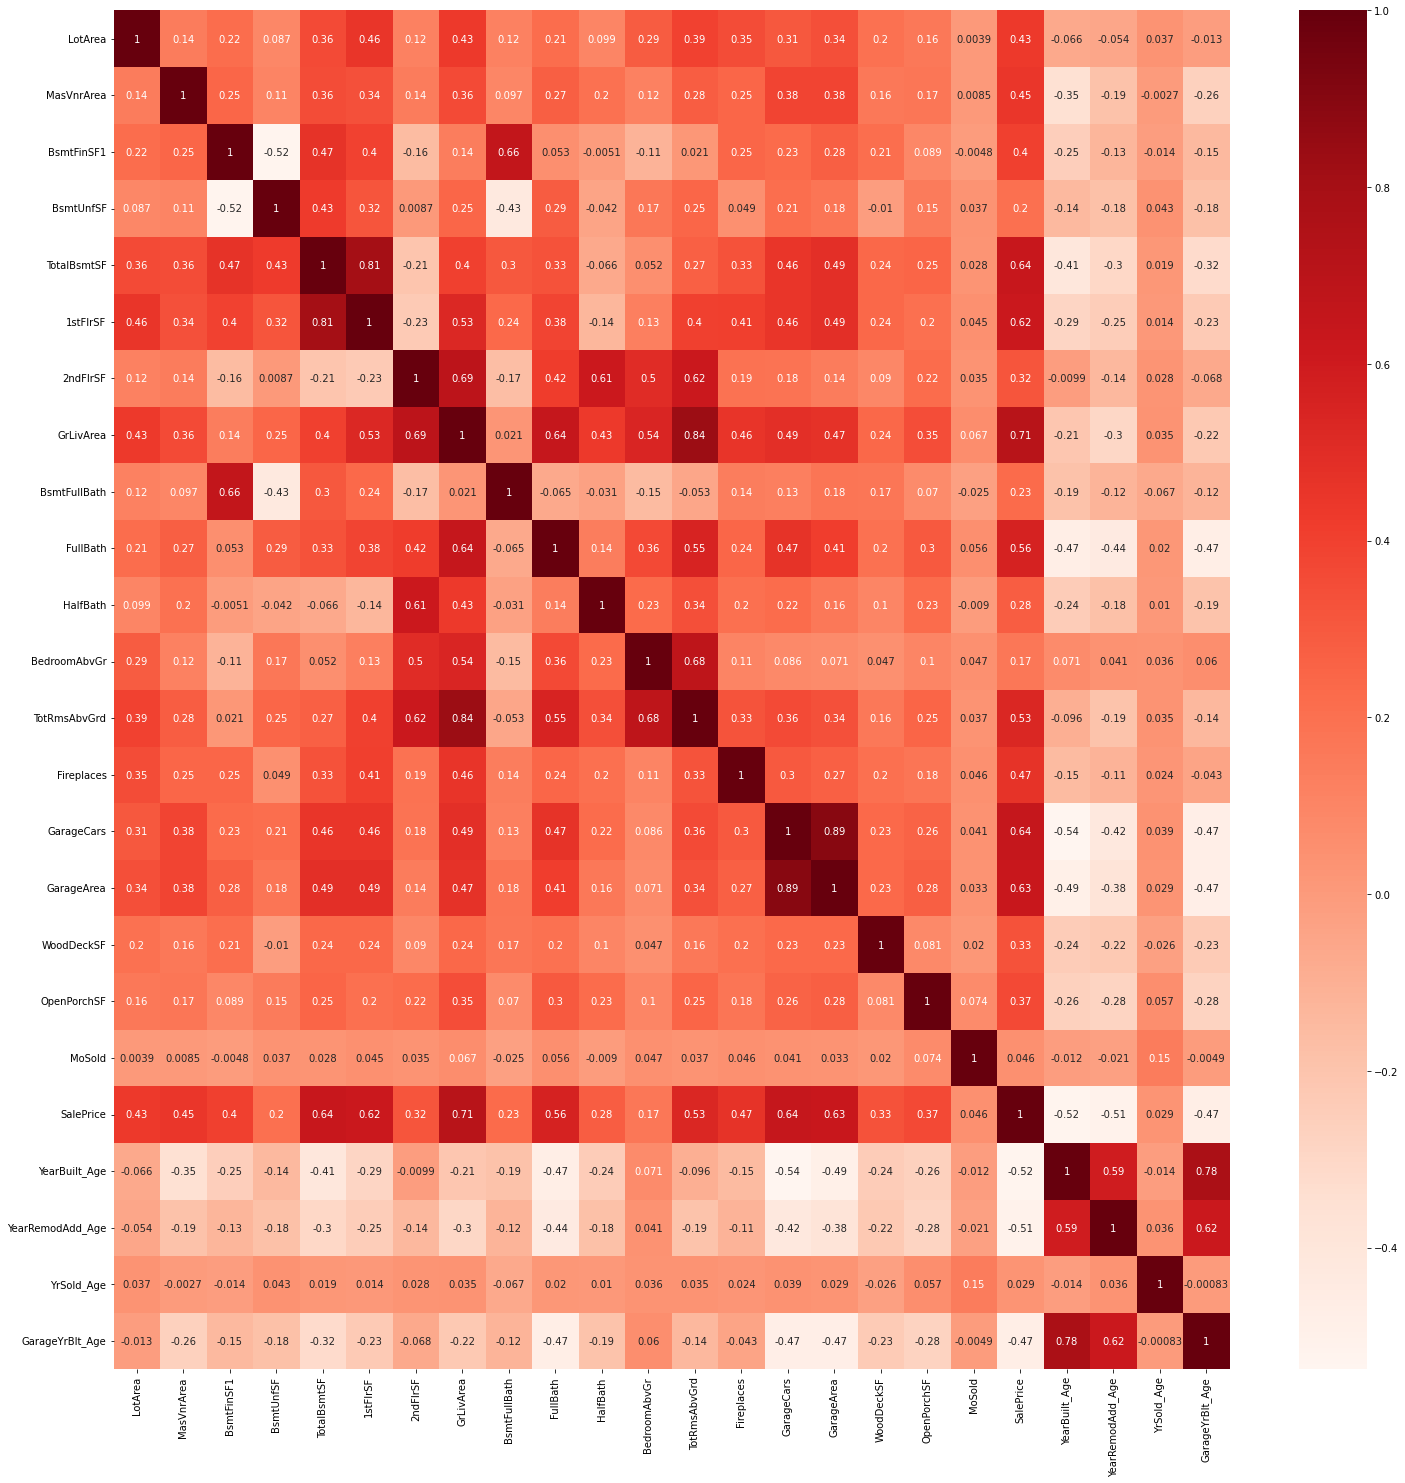

In [412]:
# Finding Correlation of all variables

plt.figure(figsize=(25,25))
sb.heatmap(sale_data.corr(),cmap="Reds",annot=True)

#### Significant Variables wrt Correlation with SalesPrice
Positively correlated variables: TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea <br>
Negatively correlated variables: YearBuilt_age, YearRemodAdd_age


#### Analysis - SalePrice column

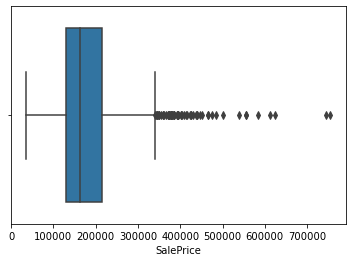

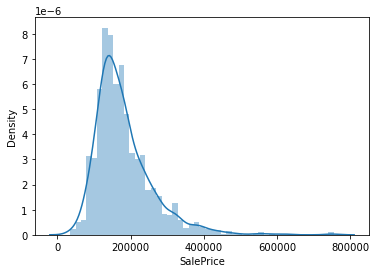

In [413]:
# Draw boxplot and distplot to check the outliers and data distrubtion
sb.boxplot(sale_data['SalePrice'])
plt.show()
sb.distplot(sale_data['SalePrice'])
plt.show()

##### As sales prize attribute data are right screwed and can see many outliers, lets check transforming to log scale.

In [414]:
sale_data['SalePrice'] = np.log1p(sale_data['SalePrice'])

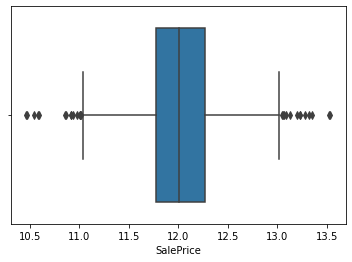

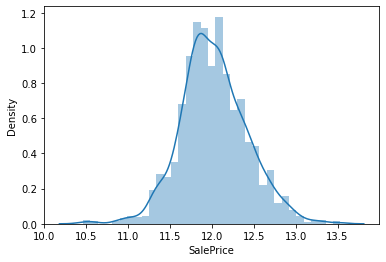

In [415]:
# Re-draw boxplot and distplot to check the outliers and data distrubtion
sb.boxplot(sale_data['SalePrice'])
plt.show()
sb.distplot(sale_data['SalePrice'])
plt.show()

##### Now data seems to be normally distributed

### Analysis: Univariate , Bivariate , Multivariate

In [416]:
#Based on variable type, categorize the variable to catorical or continuous
catg = []
cont = []
for i in sale_data:
    if sale_data[i].dtype == 'object':
        catg.append(i)
    else:
        cont.append(i)
        
print("Continuous Variables\n",cont)
print("\nCategorical Variables",catg)

Continuous Variables
 ['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'SalePrice', 'YearBuilt_Age', 'YearRemodAdd_Age', 'YrSold_Age', 'GarageYrBlt_Age']

Categorical Variables ['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'GarageType', 'GarageFinish', 'SaleCondition']


#### Univariate Analysis on Continuous variables

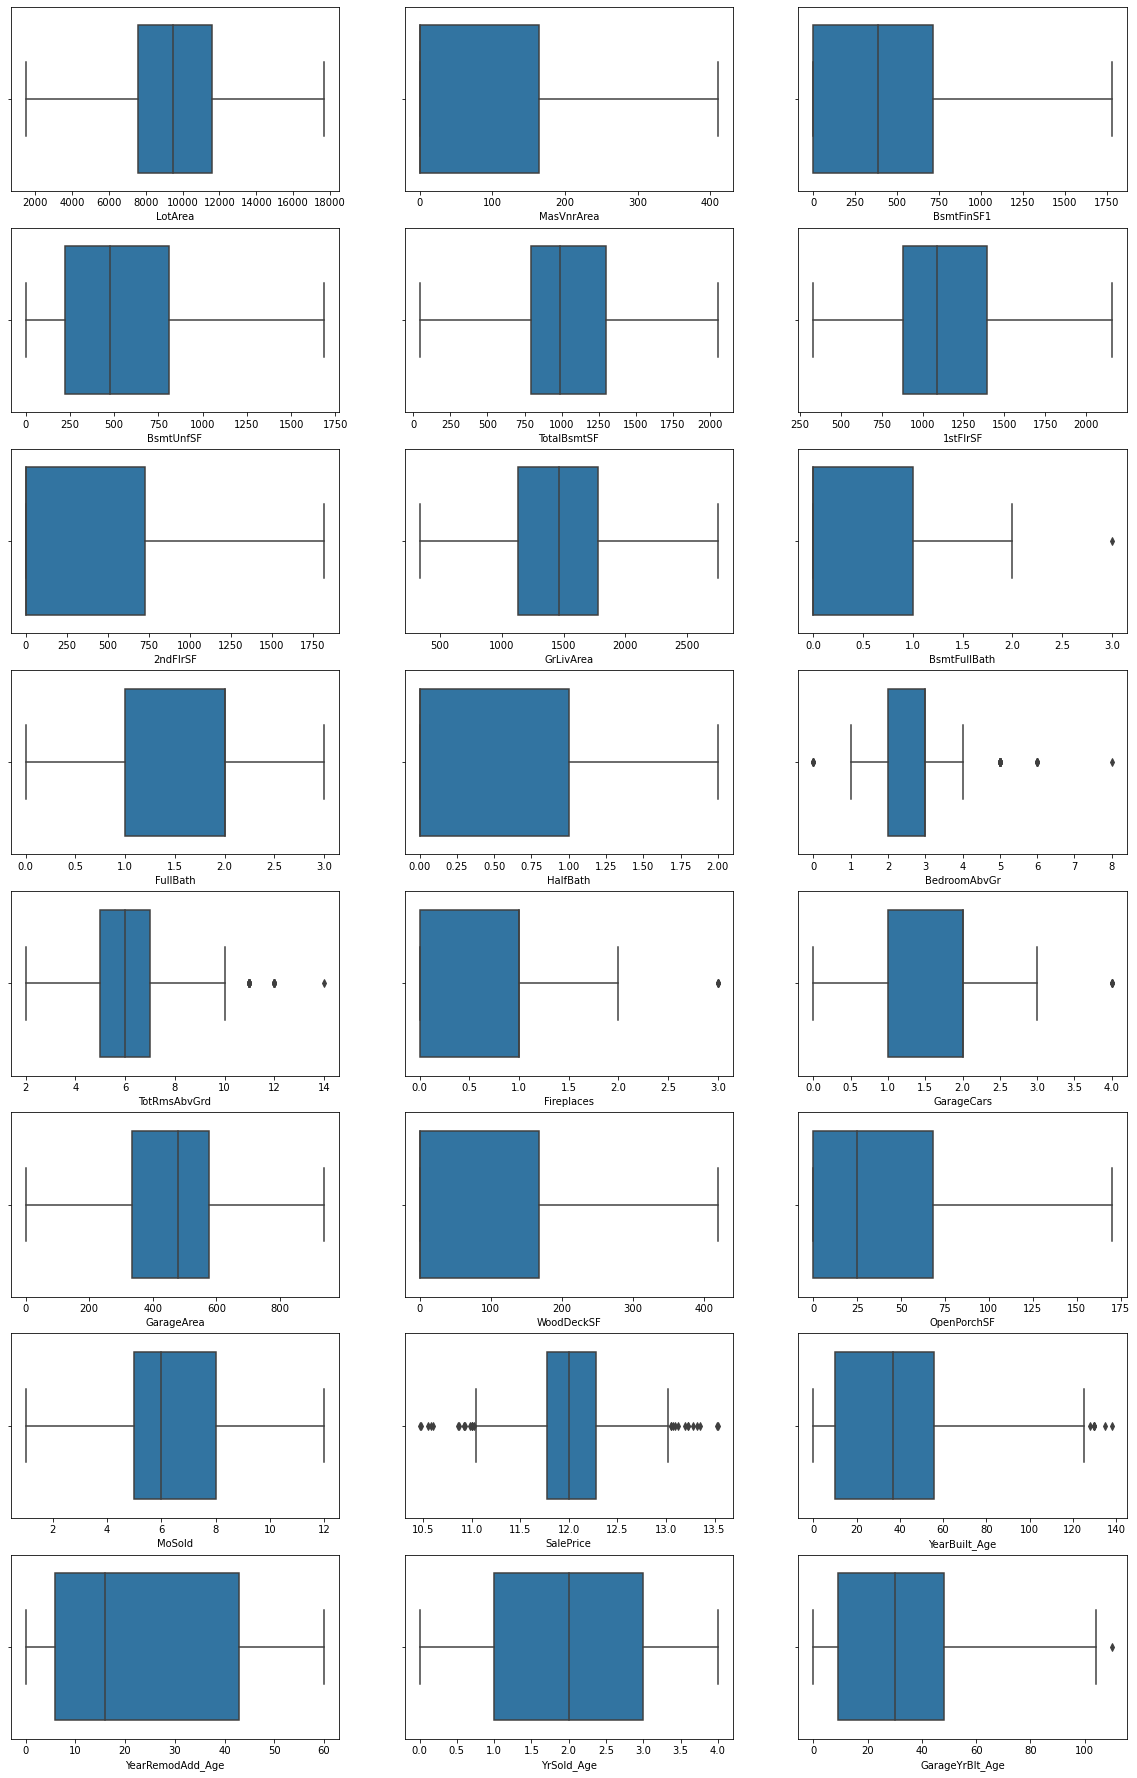

In [417]:
#Plot box plot to analyze the continous variables
plt.figure(figsize=(20,40))
for i in enumerate(cont):
    plt.subplot(10,3,i[0]+1)
    sb.boxplot(x=i[1], data=sale_data)

##### Insights:
We can see there are no much outliers and all the variables are in good shape. Below columns have categorical data and also the data is less, we are not treated them 

- BsmtFullBath
- BedroomAbvGr
- FullBath
- TotRmsAbvGrd
- Fireplaces

Variable Name:  BsmtFullBath


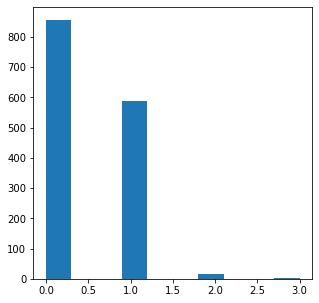

Variable Name:  BedroomAbvGr


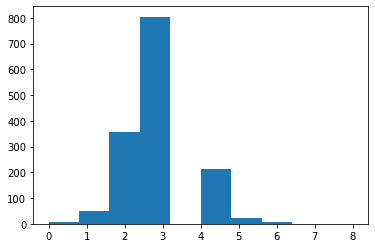

Variable Name:  FullBath


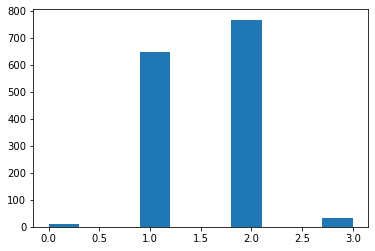

Variable Name:  TotRmsAbvGrd


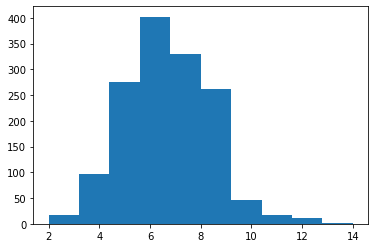

Variable Name:  Fireplaces


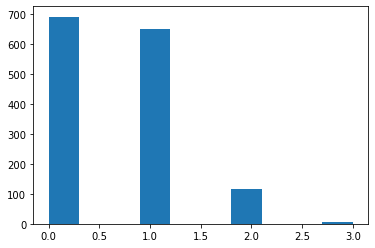

In [418]:
#Draw histogram to see the distribution of above variables
cont_ctg_var=['BsmtFullBath','BedroomAbvGr','FullBath','TotRmsAbvGrd','Fireplaces']
plt.figure(figsize=(5,5))
for i in cont_ctg_var:
    print("Variable Name: ",i)
    plt.hist(sale_data[i])
    plt.show()

##### Insights:
 - BsmtFullBath: 0 bathrooms are high and 1 bathroom seems to be second common value
 - BedroomAbvGr: 3 bedroom are high
 - FullBath: Mostly 2 bathrooms are full bathroom above grade
 - TotRmsAbvGrd: Mostly 6 rooms are above grade
 - Fireplaces: Houses with no fire places are more. 


#### Bivariate Analysis on Continuous variables

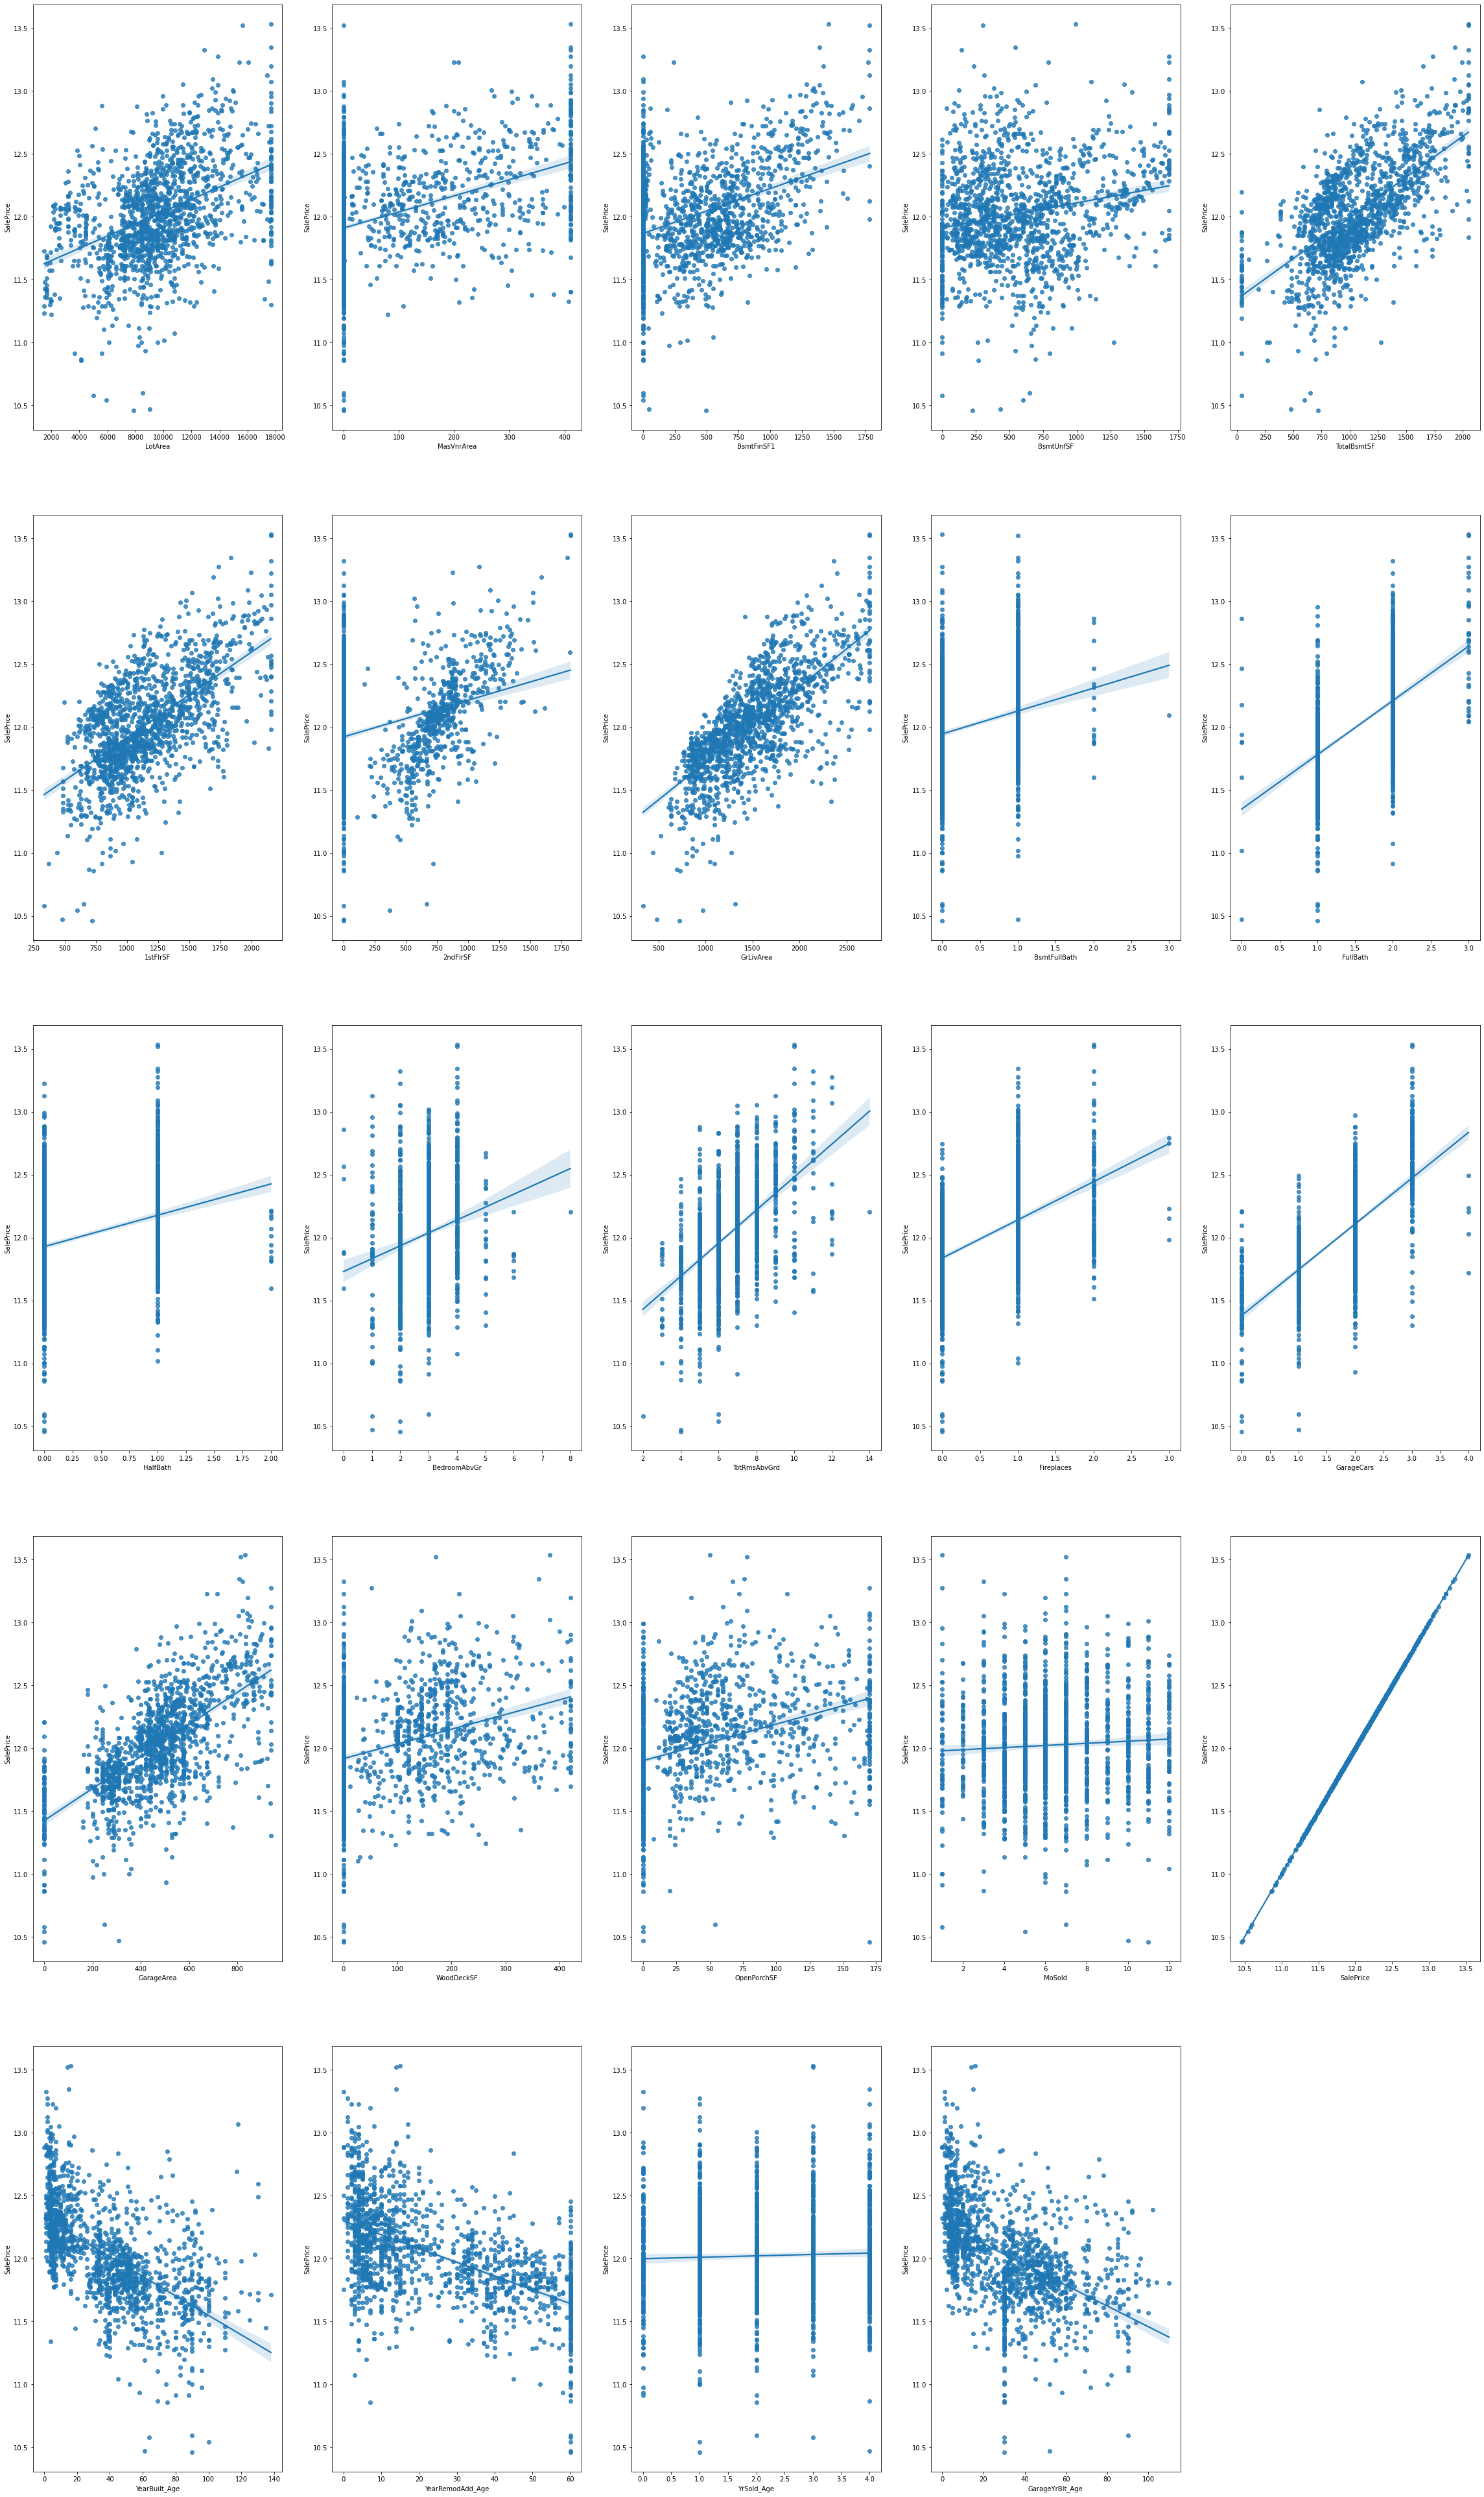

In [419]:
# Plot regplot for each numerical column against SalePrice
cols = 5
rows = len(cont)//5 + 1
plt.figure(figsize=(40, 70))
for i, name in enumerate(cont):
    plt.subplot(rows, cols, i+1)
    sb.regplot(sale_data[name], sale_data.SalePrice )

##### Insights: 
 - Except below variables, all other continuous variables are related to the SalePrice 
   - 'MoSold', 'BsmtUnfSF', 'YrSold_Age'
 - YearbuiltAge,YearRemodel_Age and garageYRBT_Age have negative correlation

#### Bivariate Analysis Categorical Variables

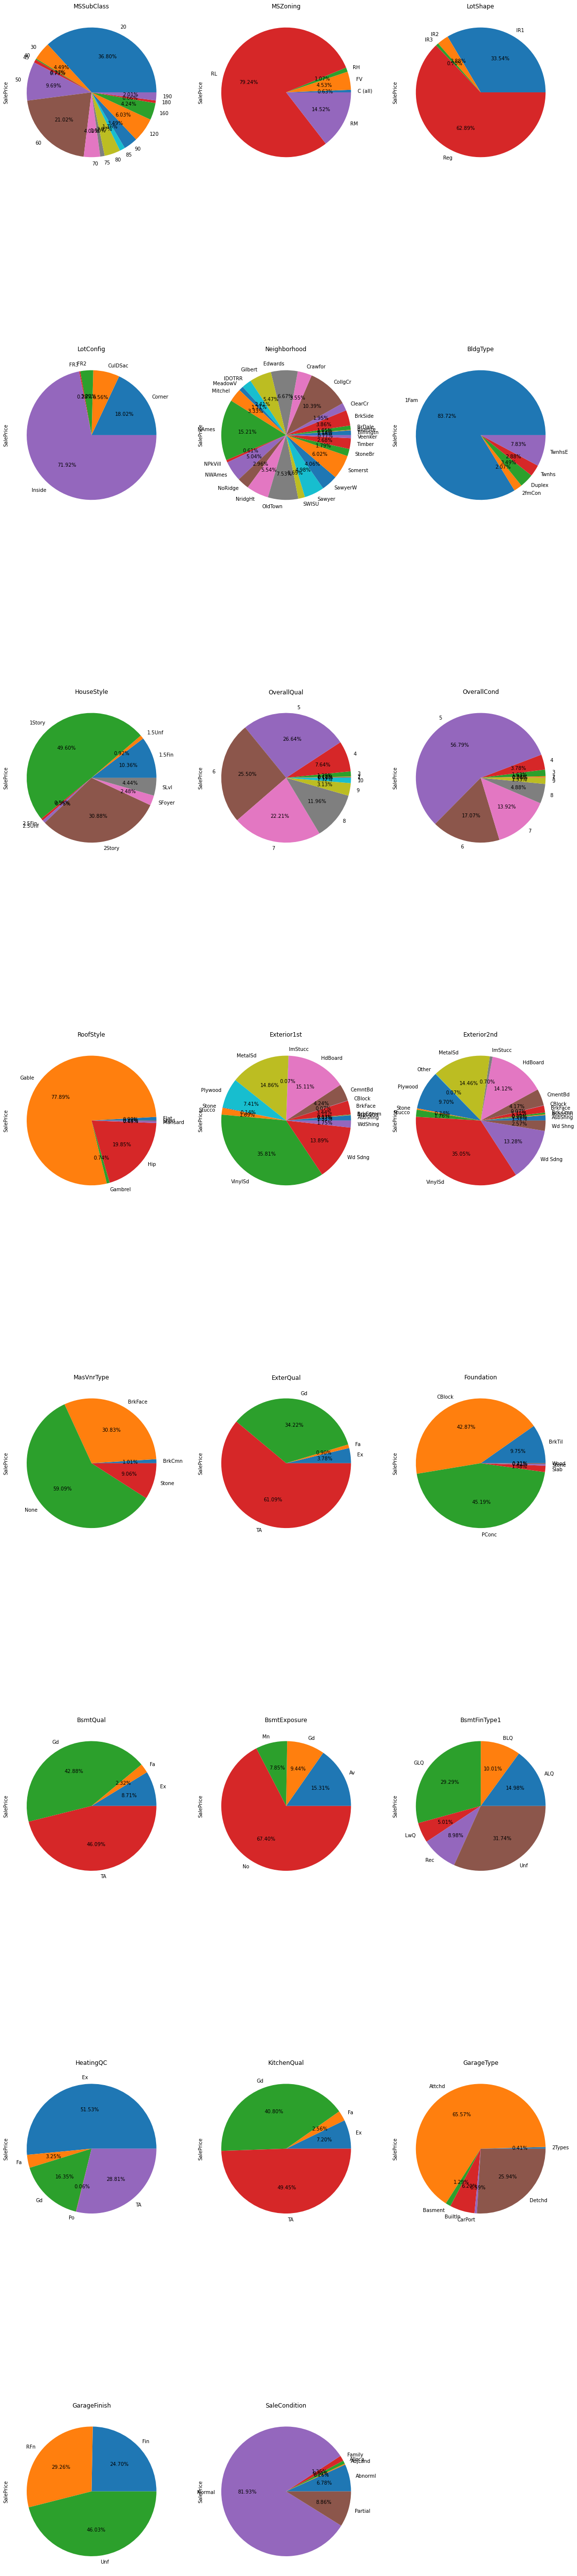

In [420]:
plt.figure(figsize = (20,100))
for i, col in enumerate(catg):
    plt.subplot(8,3,i+1)
    sale_data.groupby([col])['SalePrice'].agg('sum').plot.pie(autopct='%1.2f%%')
    plt.title(col)
plt.show()

##### Insights:
Higher Sales Prize for respective categorical variable is as below
 - MSSubClass – 20
 - MSZoning - Residential Low Density
 - LotShape – Regular
 - LotConfig- Inside
 - Neighborhood - North Ames
 - BldgType - Single-family Detached
 - HouseStyle  - One story
 - OverallQual – Average and Above Average
 - OverallCond – Average
 - RoofStyle – Gable
 - Exterior1st & Exterior2nd - Vinyl Siding
 - MasVnrType  - None has higher value. Excluding None, Brick Face has high sales prize
 - ExterQual - Average/Typical
 - Foundation - Poured Concrete and Cinder Block
 - BsmtQual - Typical (80-89 inches) and Good (90-99 inches)
 - BsmtExposure - No Exposure
 - HeatingQC – Excellent quality and condition
 - KitchenQual - Typical/Average and Good
 - GarageType - Attached to home
 - GarageFinish – Unfinished (as most of the garage will not be having interior finishing)
 - SaleCondition – Normal Sale condition
<br><br>
Summary:
<br>
 - Higher sales prize is for MSSubClass 20
 - House with Residential Low Density MSZoning has higher sales
 - House with Regular LotShape and Inside Lotconfig has higher sales
 - North Ames neighborhood has higher sales prize
 - Single-family Detached building type has higher sales
 - House in normal sale condition with Typical/Average kitchen quality, Excellent heating quality, Average/ Typical exterior quality has higher sale prize
 - House with average overall quality and condition have higher sales prize
 - House with attached Garage type and though its unfinished has higher sales prize
 - Basement with height of Typical (80-89 inches) and Good (90-99 inches) and No Exposure have highest sales prize
 - House with Poured Concrete and Cinder Block foundations has more sales




#### Multivariate Analysis

<AxesSubplot:>

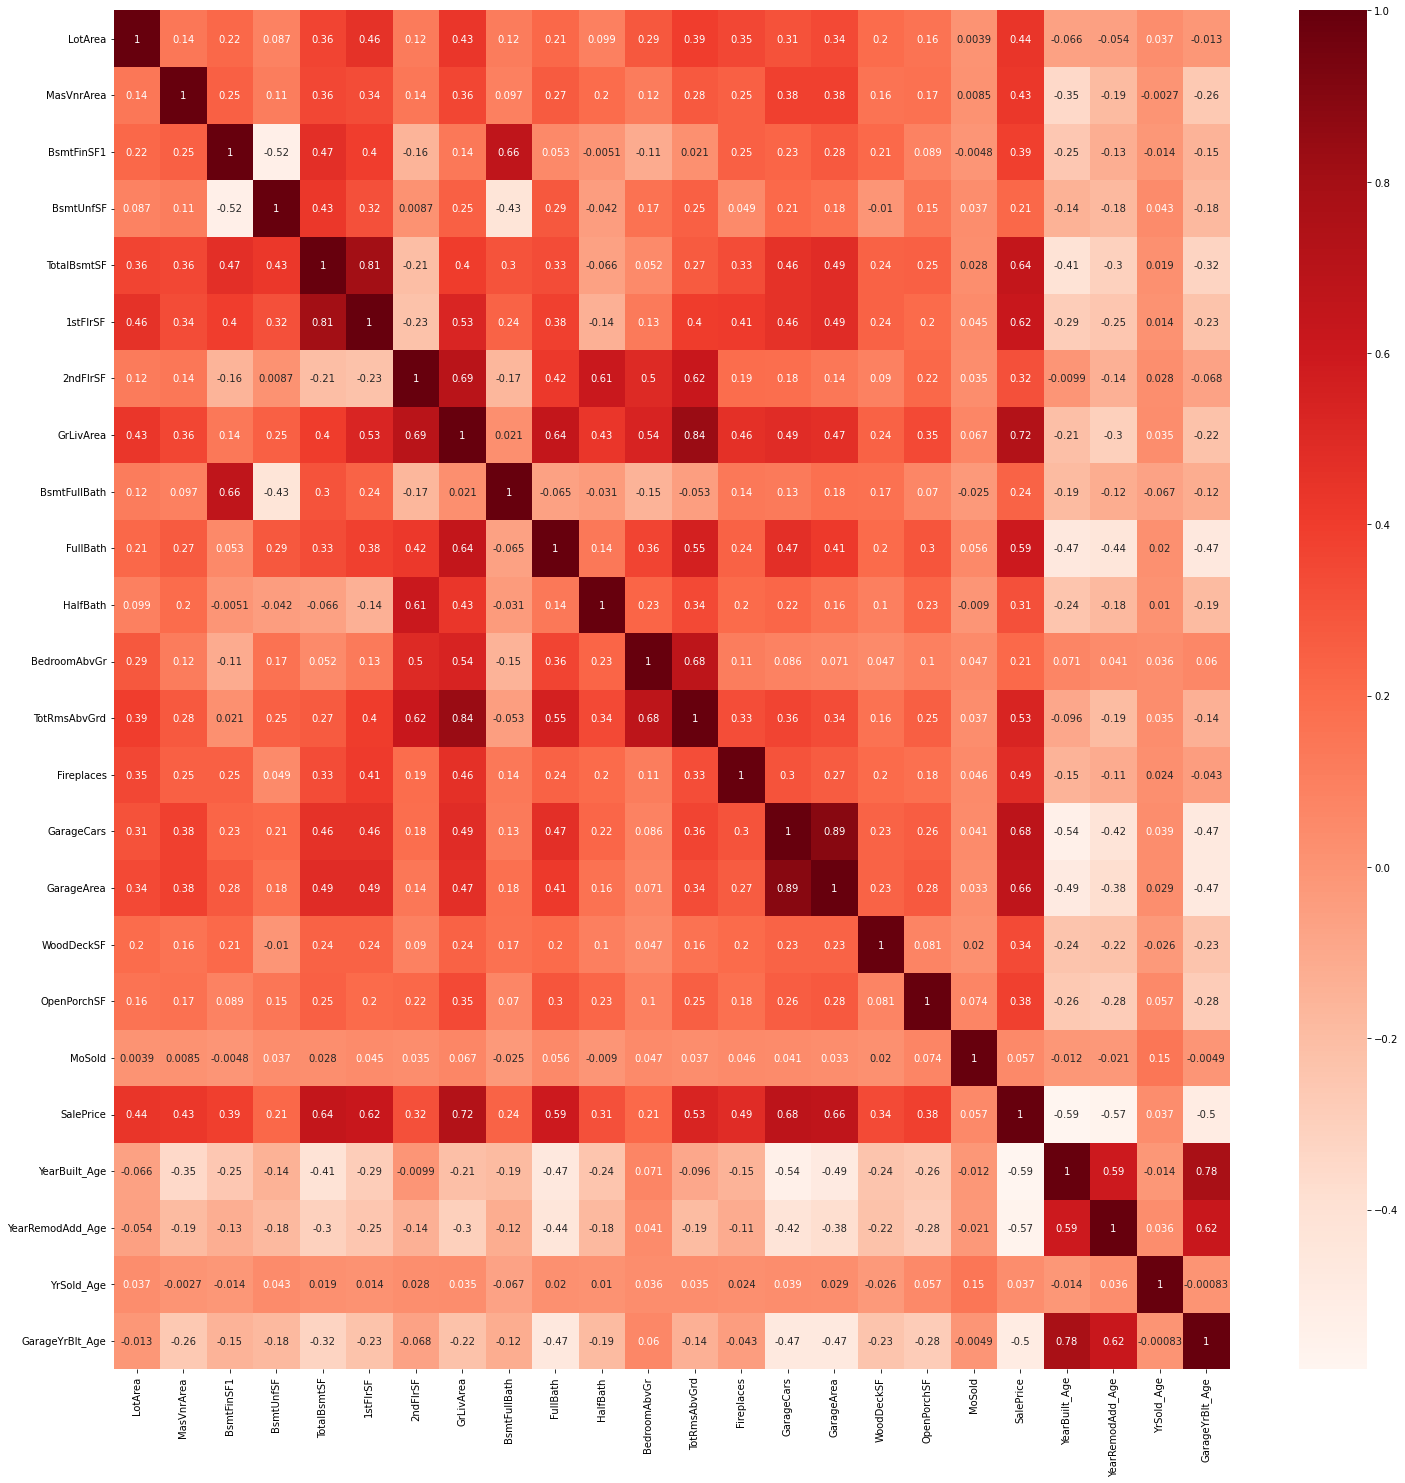

In [421]:
# Finding Correlation of all variables

plt.figure(figsize=(25,25))
sb.heatmap(sale_data.corr(),cmap="Reds",annot=True)

##### Insights:
Significant Variables wrt Correlation with SalesPrice

 - Positively correlated variables: TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea
 - Negatively correlated variables: YearBuilt_age, YearRemodAdd_age,GarageYrBlt_Age


#### Data Preprocessing

In [422]:
# Changing datatype of OverallQual and OverallCond

sale_data.OverallQual = sale_data.OverallQual.astype(float)
sale_data.OverallCond = sale_data.OverallCond.astype(float)

In [423]:
# map MSSubClass to its categorical name
sale_data["MSSubClass"] = sale_data["MSSubClass"].map({20:"subclass1", 30:"subclass2", 40:"subclass3", 45:"subclass4",
                                                   50:"subclass5", 60:"subclass6", 70:"subclass7", 75:"subclass8",
                                                   80:"subclass9", 85:"subclass10", 90:"subclass11", 120:"subclass12",
                                                   150:"subclass13", 160:"subclass14", 180:"subclass15", 190:"subclass16"})

##### Encoding Categorical Variables

In [424]:
# List of Categorical Variables
print(catg)

['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'GarageType', 'GarageFinish', 'SaleCondition']


In [425]:
# Ordinal categorical variable using LabelEncoder

le = LabelEncoder()

catg_col_list = ['ExterQual', 'BsmtQual','BsmtExposure', 
                'BsmtFinType1', 'HeatingQC','KitchenQual', 
                'GarageFinish', 'LotShape']

sale_data[catg_col_list] = sale_data[catg_col_list].apply(le.fit_transform)

sale_data[catg_col_list].head(5)

ExterQual  BsmtQual  BsmtExposure  BsmtFinType1  HeatingQC  KitchenQual  \
0          2         2             3             2          0            2   
1          3         2             1             0          0            3   
2          2         2             2             2          0            2   
3          3         3             3             0          2            2   
4          2         2             0             2          0            2   

   GarageFinish  LotShape  
0             1         3  
1             1         3  
2             1         0  
3             2         0  
4             1         0

In [426]:
# Non Ordered Categorical variable using one hot encoding dummy variable

pd.set_option('display.max_columns', None)

non_or_catg_list = ['MSSubClass', 'MSZoning','LotConfig','Neighborhood', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType','Foundation','GarageType','SaleCondition']

for i in non_or_catg_list:
    sale_data = pd.get_dummies(data=sale_data,columns=[i],drop_first=True)

sale_data.head()

LotArea  LotShape  OverallQual  OverallCond  MasVnrArea  ExterQual  \
0   8450.0         3          7.0          5.0       196.0          2   
1   9600.0         3          6.0          8.0         0.0          3   
2  11250.0         0          7.0          5.0       162.0          2   
3   9550.0         0          7.0          5.0         0.0          3   
4  14260.0         0          8.0          5.0       350.0          2   

   BsmtQual  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  \
0         2             3             2       706.0      150.0          856   
1         2             1             0       978.0      284.0         1262   
2         2             2             2       486.0      434.0          920   
3         3             3             0       216.0      540.0          756   
4         2             0             2       655.0      490.0         1145   

   HeatingQC  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  \
0          0     856.0       854     1710.0             1         2         1   
1          0    1262.0         0     1262.0             0         2         0   
2          0     920.0       866     1786.0             1         2         1   
3          2     961.0       756     1717.0             1         1         0   
4          0    1145.0      1053     2198.0             1         2         1   

   BedroomAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces  GarageFinish  \
0             3            2             8           0             1   
1             3            3             6           1             1   
2             3            2             6           1             1   
3             3            2             7           1             2   
4             4            2             9           1             1   

   GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  MoSold  SalePrice  \
0           2       548.0           0           61       2  12.247699   
1           2       460.0         298            0       5  12.109016   
2           2       608.0           0           42       9  12.317171   
3           3       642.0           0           35       2  11.849405   
4           3       836.0         192           84      12  12.429220   

   YearBuilt_Age  YearRemodAdd_Age  YrSold_Age  GarageYrBlt_Age  \
0              7                 7           2              7.0   
1             34                34           3             34.0   
2              9                 8           2              9.0   
3             95                40           4             12.0   
4             10                10           2             10.0   

   MSSubClass_subclass10  MSSubClass_subclass11  MSSubClass_subclass12  \
0                      0                      0                      0   
1                      0                      0                      0   
2                      0                      0                      0   
3                      0                      0                      0   
4                      0                      0                      0   

   MSSubClass_subclass14  MSSubClass_subclass15  MSSubClass_subclass16  \
0                      0                      0                      0   
1                      0                      0                      0   
2                      0                      0                      0   
3                      0                      0                      0   
4                      0                      0                      0   

   MSSubClass_subclass2  MSSubClass_subclass3  MSSubClass_subclass4  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   MSSubCl

In [427]:
sale_data.shape

(1460, 143)

In [428]:
#Taking Backup of final dataset
sale_data_bkp=sale_data

### Model Preparation / Building

In [429]:
# Splitting the train and test data
df_train, df_test = train_test_split(sale_data, train_size=.7, random_state=100)

#### Feature Scaling

In [430]:
# Using the standard scaling to bring all the columns on same scale

scale_var = ['LotArea','LotShape','OverallQual','OverallCond','MasVnrArea','ExterQual','BsmtQual',
              'BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','HeatingQC','1stFlrSF',
              '2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','YearBuilt_Age','YearRemodAdd_Age',
              'YrSold_Age','GarageYrBlt_Age']

scaler = StandardScaler()

df_train[scale_var] = scaler.fit_transform(df_train[scale_var])
df_test[scale_var] = scaler.transform(df_test[scale_var])

df_train.head()

LotArea  LotShape  OverallQual  OverallCond  MasVnrArea  ExterQual  \
318   0.079963   0.74876     0.648310    -0.532073    1.238391  -0.785464   
239  -0.243507   0.74876    -0.066511    -1.448170   -0.662880   0.664732   
986  -1.201080   0.74876    -0.066511     2.216221   -0.662880   0.664732   
1416  0.481859   0.74876    -1.496155     0.384025   -0.662880   0.664732   
390  -0.337283   0.74876    -0.781333     2.216221   -0.662880   0.664732   

      BsmtQual  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtUnfSF  \
318  -0.316792     -1.086173     -0.416850    1.251373  -0.457055   
239   0.830175      0.650683      0.131608   -0.804614   0.184537   
986   0.830175      0.650683      1.228525   -1.021034  -0.171649   
1416  0.830175      0.650683      1.228525   -1.021034   0.495058   
390   0.830175      0.650683      0.680067   -0.466171  -0.756160   

      TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  \
318      0.724859  -0.862909  0.572240  2.143465   2.393081             1   
239     -0.781427   1.434432 -0.989637  0.796243  -0.036040             0   
986     -1.396740   0.285761 -0.437266  0.669581   0.274150             0   
1416    -0.678055   0.285761  0.229389  1.613788   1.646949             0   
390     -0.471309  -0.862909 -0.546108  0.144510  -0.287545             1   

      FullBath  HalfBath  BedroomAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces  \
318          2         1             4            2             9           1   
239          1         1             3            3             7           1   
986          1         0             2            2             5           0   
1416         2         0             4            3            11           0   
390          1         0             4            3             7           0   

      GarageFinish  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  MoSold  \
318              1           3    0.905544    2.151689     0.320903       4   
239              2           1   -1.215156   -0.778856     1.836535       4   
986              2           1   -1.044916    2.617129    -0.815821       6   
1416             2           2    0.438601   -0.778856    -0.815821       4   
390              2           1   -0.417461   -0.778856     1.647081       4   

      SalePrice  YearBuilt_Age  YearRemodAdd_Age  YrSold_Age  GarageYrBlt_Age  \
318   12.468441      -0.715324         -0.389207   -0.882411        -0.590876   
239   11.635152       0.868511          1.698692   -1.629460         1.247132   
986   11.669938       2.023391         -0.874765    1.358737         1.205359   
1416  11.715874       2.848305          1.698692   -1.629460         0.328128   
390   11.686887       2.353356          1.698692   -0.135361         0.035718   

      MSSubClass_subclass10  MSSubClass_subclass11  MSSubClass_subclass12  \
318                       0                      0                      0   
239                       0                      0                      0   
986                       0                      0                      0   
1416                      0                      0                      0   
390                       0                      0                      0   

      MSSubClass_subclass14  MSSubClass_subclass15  MSSubClass_subclass16  \
318                       0                      0                      0   
239                       0                      0                      0   
986                       0                      0                      0   
1416                      0                      0                      1   
390                       0                      0                      0   

      MSSubClass_subclass2  MSSubClass_subclass3  MSSubClass_subclass4  \
318                      0                     0                     0   
239                      0                     0                     0   
986                      0                     0                     

In [431]:
# Split xtrain,xtest,ytrain,ytest
ytrain = df_train.pop('SalePrice')
xtrain = df_train
ytest  = df_test.pop('SalePrice')
xtest  = df_test

In [432]:
#Implementing the Model using Linear Regression , RFE , CrossValidation & VIF

folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

param_value = [{'n_features_to_select': list(range(0,161, 10))}]

lm = LinearRegression()
lm.fit(xtrain, ytrain)
rfe = RFE(lm)             

model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = param_value, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# fit the model
model_cv.fit(xtrain, ytrain)  

Fitting 5 folds for each of 17 candidates, totalling 85 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [0, 10, 20, 30, 40, 50, 60,
                                                   70, 80, 90, 100, 110, 120,
                                                   130, 140, 150, 160]}],
             return_train_score=True, scoring='r2', verbose=1)

In [433]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.loc[:, ['param_n_features_to_select', 'mean_test_score', 'mean_train_score']]


param_n_features_to_select  mean_test_score  mean_train_score
0                           0              NaN               NaN
1                          10     7.588767e-01          0.791617
2                          20     8.242890e-01          0.857828
3                          30     8.564412e-01          0.894336
4                          40     8.822105e-01          0.910620
5                          50     8.833653e-01          0.919735
6                          60    -3.160486e+21          0.921163
7                          70    -5.406669e+21          0.924560
8                          80    -7.219868e+21          0.923717
9                          90    -1.705827e+23          0.921030
10                        100    -2.459344e+22          0.930541
11                        110    -2.807111e+22          0.927399
12                        120    -1.802963e+23          0.926637
13                        130    -7.864290e+22          0.933746
14                        140    -2.188299e+22          0.934048
15                        150    -5.096762e+21          0.934103
16                        160    -5.096762e+21          0.934103

We can see that with the increase in number of features, mean test score is getting negative. So, we will build model with less than 50 features.

In [434]:
# Function to select top n features
def get_top_features(n):
    lm = LinearRegression()
    lm.fit(xtrain, ytrain)
    rfe = RFE(lm,n)
    rfe = rfe.fit(xtrain,ytrain)
    top_features = xtrain.columns[rfe.support_]
    return top_features

In [435]:

# We can see that with the increase in number of features, mean test score is getting negative. So, we will build the model till less than 50 features with 10 feature count difference.

feature_10 = get_top_features(10)
feature_20 = get_top_features(20)
feature_30 = get_top_features(30)
feature_40 = get_top_features(40)
feature_50 = get_top_features(50)

In [436]:
# Creating a function to return the OLS model

def ols_model(df_ytrain,df_xtrain_rfe):
 
    # Input parameter wll be the training dataset and output will be the ols model
    # we need to add constant to the xtrain and before fitting to OLS
    df_xtrain_sm = stats.add_constant(df_xtrain_rfe)
    lm = stats.OLS(df_ytrain,df_xtrain_sm)
    lm_model = lm.fit()
    return lm_model,df_xtrain_sm

# Creating a function to return the Varince Inflation Factor 

def variance_inflation(df_xtrain):
    # Input parameter will be the training dataset and the output will be the vif data frame
    vif = pd.DataFrame()
    vif['features'] = df_xtrain.columns
    vif['VIF'] = [variance_inflation_factor(df_xtrain.values,i) for i in range(df_xtrain.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by="VIF",ascending=False)
    return vif

In [437]:
#Model created with feature_10
model1,df_xtrain_sm1 = ols_model(ytrain,xtrain[feature_10])
vif = variance_inflation(xtrain[feature_10])
print(model1.summary())
print("\n Variance Inflation Factor \n",vif)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     414.6
Date:                Mon, 26 Sep 2022   Prob (F-statistic):               0.00
Time:                        18:34:41   Log-Likelihood:                 328.23
No. Observations:                1021   AIC:                            -634.5
Df Residuals:                    1010   BIC:                            -580.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   11.5145 

In [438]:
#Model created with feature_20
model2,df_xtrain_sm2 = ols_model(ytrain,xtrain[feature_20])
vif = variance_inflation(xtrain[feature_20])
print(model2.summary())
print("\n Variance Inflation Factor \n",vif)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     281.3
Date:                Mon, 26 Sep 2022   Prob (F-statistic):               0.00
Time:                        18:34:41   Log-Likelihood:                 461.36
No. Observations:                1021   AIC:                            -880.7
Df Residuals:                    1000   BIC:                            -777.2
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   11.4728 

In [439]:
#Model created with feature_30
model3,df_xtrain_sm3 = ols_model(ytrain,xtrain[feature_30])
vif = variance_inflation(xtrain[feature_30])
print(model3.summary())
print("\n Variance Inflation Factor \n",vif)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     240.4
Date:                Mon, 26 Sep 2022   Prob (F-statistic):               0.00
Time:                        18:34:41   Log-Likelihood:                 575.38
No. Observations:                1021   AIC:                            -1089.
Df Residuals:                     990   BIC:                            -936.0
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    11.26

In [440]:
#Model created with feature_40
model4,df_xtrain_sm4 = ols_model(ytrain,xtrain[feature_40])
vif = variance_inflation(xtrain[feature_40])
print(model4.summary())
print("\n Variance Inflation Factor \n",vif)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     211.7
Date:                Mon, 26 Sep 2022   Prob (F-statistic):               0.00
Time:                        18:34:42   Log-Likelihood:                 640.71
No. Observations:                1021   AIC:                            -1201.
Df Residuals:                     981   BIC:                            -1004.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    11.27

In [441]:
#Model created with feature_50
model5,df_xtrain_sm5 = ols_model(ytrain,xtrain[feature_50])
vif = variance_inflation(xtrain[feature_50])
print(model5.summary())
print("\n Variance Inflation Factor \n",vif)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     204.7
Date:                Mon, 26 Sep 2022   Prob (F-statistic):               0.00
Time:                        18:34:42   Log-Likelihood:                 714.93
No. Observations:                1021   AIC:                            -1334.
Df Residuals:                     973   BIC:                            -1097.
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    11.32

#### Considering the number of features wrt optimum R2 and F-statistic values, we will consider model3 wth 30 features.  We will remove columns based on VIF and P-values considering below preference
High pvalue , high VIF - remove first

High pvalue , low VIF - remove second

Low  pvalue , high VIF - removed third

In [442]:
#Print Model summary of Model3
print(model3.summary())
vif3 = variance_inflation(xtrain[feature_30])
print("\n Variance Inflation Factor \n",vif3)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     240.4
Date:                Mon, 26 Sep 2022   Prob (F-statistic):               0.00
Time:                        18:35:14   Log-Likelihood:                 575.38
No. Observations:                1021   AIC:                            -1089.
Df Residuals:                     990   BIC:                            -936.0
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    11.26

In [443]:
#creating another df for train
x_train_rfe=xtrain[feature_30]

In [444]:
x_train_rfe

OverallQual  GrLivArea  BsmtFullBath  GarageCars  MSSubClass_subclass2  \
318      0.648310   2.393081             1           3                     0   
239     -0.066511  -0.036040             0           1                     0   
986     -0.066511   0.274150             0           1                     0   
1416    -1.496155   1.646949             0           2                     0   
390     -0.781333  -0.287545             1           1                     0   
1005    -0.781333  -1.088170             0           1                     0   
568      1.363132   1.315800             1           2                     0   
342     -2.210976  -0.972897             0           2                     0   
114     -0.066511   1.709825             1           1                     0   
499     -0.781333  -1.241169             0           1                     0   
365     -0.781333  -0.335750             0           1                     0   
308     -1.496155  -1.348059             0           2                     1   
797     -0.781333  -1.532496             0           1                     0   
703     -0.781333   0.645120             0           2                     0   
858      0.648310  -0.281257             0           2                     0   
25       1.363132   0.200794             0           3                     0   
88      -2.210976   0.045699             0           0                     0   
1129    -0.781333  -1.190868             1           2                     0   
1425    -0.066511  -0.528571             0           2                     0   
728     -0.781333   0.569668             1           3                     0   
883     -1.496155   1.521196             1           1                     0   
606     -0.781333  -0.972897             1           2                     0   
1183    -0.781333  -0.784268             1           2                     1   
808     -0.781333  -0.876486             1           2                     0   
452     -0.066511   0.527751             1           2                     0   
1395     1.363132   2.049357             0           3                     0   
1078    -0.066511  -1.375305             1           2                     0   
146     -0.781333  -1.318716             1           1                     1   
906      1.363132   0.276246             1           3                     0   
614     -1.496155  -1.832206             1           0                     0   
405     -1.496155   0.242712             1           2                     0   
45       2.077954   0.519367             1           2                     0   
1443    -0.066511  -1.157334             0           1                     1   
1241     0.648310   0.387327             0           3                     0   
537     -1.496155  -1.341771             0           2                     0   
454     -0.781333   0.469066             2           2                     0   
160     -0.066511  -0.570488             0           2                     0   
1433    -0.066511   0.603202             1           2                     0   
1037     1.363132   1.590360             0           2                     0   
106     -1.496155  -0.958226             0           1                     1   
1307    -0.781333  -1.077691             1           2                     0   
876     -1.496155  -0.972897             1           2                     0   
771     -1.496155  -0.595639             0           2                     0   
890     -0.781333  -1.216018             0           2                     0   
420      0.648310  -0.335750             2           4                     0   
1446    -0.781333  -0.662707             0           1                     0   
1315    -0.066511   1.273883             0           2                     0   
384     -0.066511   0.940638             1           2                     0   
1047    -0.781333  -1.077691             0           2                     0   
1333  

In [445]:
# Removed High Pvalue : Exterior1st_CBlock
x_train_rfe = x_train_rfe.drop(columns=["Exterior1st_CBlock"],axis=1)

In [446]:
model3,df_xtrain_sm3 = ols_model(ytrain,x_train_rfe)
vif3 = variance_inflation(x_train_rfe)
print(model3.summary())
print("\n Variance Inflation Factor \n",vif3)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     248.8
Date:                Mon, 26 Sep 2022   Prob (F-statistic):               0.00
Time:                        18:38:13   Log-Likelihood:                 575.13
No. Observations:                1021   AIC:                            -1090.
Df Residuals:                     991   BIC:                            -942.4
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    11.26

In [447]:
#Removing high p-value: MSSubClass_subclass3
x_train_rfe = x_train_rfe.drop(columns=["MSSubClass_subclass3"],axis=1)

In [448]:
#Rebuild the model
model3,df_xtrain_sm3 = ols_model(ytrain,x_train_rfe)
vif3 = variance_inflation(x_train_rfe)
print(model3.summary())
print("\n Variance Inflation Factor \n",vif3)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     257.7
Date:                Mon, 26 Sep 2022   Prob (F-statistic):               0.00
Time:                        18:38:25   Log-Likelihood:                 574.69
No. Observations:                1021   AIC:                            -1091.
Df Residuals:                     992   BIC:                            -948.4
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    11.26

In [449]:
#Removing high p-value: Exterior1st_Stucco
x_train_rfe = x_train_rfe.drop(columns=["Exterior1st_Stucco"],axis=1)

In [450]:
#Rebuild the model
model3,df_xtrain_sm3 = ols_model(ytrain,x_train_rfe)
vif3 = variance_inflation(x_train_rfe)
print(model3.summary())
print("\n Variance Inflation Factor \n",vif3)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     267.2
Date:                Mon, 26 Sep 2022   Prob (F-statistic):               0.00
Time:                        18:38:43   Log-Likelihood:                 574.13
No. Observations:                1021   AIC:                            -1092.
Df Residuals:                     993   BIC:                            -954.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    11.26

In [451]:
#Removing high p-value: Neighborhood_MeadowV
x_train_rfe = x_train_rfe.drop(columns=["Neighborhood_MeadowV"],axis=1)

In [452]:
#Rebuild the model
model3,df_xtrain_sm3 = ols_model(ytrain,x_train_rfe)
vif3 = variance_inflation(x_train_rfe)
print(model3.summary())
print("\n Variance Inflation Factor \n",vif3)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     277.2
Date:                Mon, 26 Sep 2022   Prob (F-statistic):               0.00
Time:                        18:38:50   Log-Likelihood:                 573.33
No. Observations:                1021   AIC:                            -1093.
Df Residuals:                     994   BIC:                            -959.6
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    11.26

In [453]:
#Removing high vif feature MSZoning_RL
x_train_rfe = x_train_rfe.drop(columns=["MSZoning_RL"],axis=1)

In [454]:
#Rebuild the model
model3,df_xtrain_sm3 = ols_model(ytrain,x_train_rfe)
vif3 = variance_inflation(x_train_rfe)
print(model3.summary())
print("\n Variance Inflation Factor \n",vif3)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     265.6
Date:                Mon, 26 Sep 2022   Prob (F-statistic):               0.00
Time:                        18:39:02   Log-Likelihood:                 536.35
No. Observations:                1021   AIC:                            -1021.
Df Residuals:                     995   BIC:                            -892.6
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    11.70

In [455]:
#removing high p-value feature MSZoning_RH 
x_train_rfe = x_train_rfe.drop(columns=["MSZoning_RH"],axis=1)

In [456]:
#Rebuild the model
model3,df_xtrain_sm3 = ols_model(ytrain,x_train_rfe)
vif3 = variance_inflation(x_train_rfe)
print(model3.summary())
print("\n Variance Inflation Factor \n",vif3)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     277.0
Date:                Mon, 26 Sep 2022   Prob (F-statistic):               0.00
Time:                        18:39:15   Log-Likelihood:                 536.33
No. Observations:                1021   AIC:                            -1023.
Df Residuals:                     996   BIC:                            -899.4
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    11.70

In [457]:
#removing high p-value feature MSZoning_FV 
x_train_rfe = x_train_rfe.drop(columns=["MSZoning_FV"],axis=1)

In [458]:
#Rebuild the model
model3,df_xtrain_sm3 = ols_model(ytrain,x_train_rfe)
vif3 = variance_inflation(x_train_rfe)
print(model3.summary())
print("\n Variance Inflation Factor \n",vif3)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     288.9
Date:                Mon, 26 Sep 2022   Prob (F-statistic):               0.00
Time:                        18:39:21   Log-Likelihood:                 535.62
No. Observations:                1021   AIC:                            -1023.
Df Residuals:                     997   BIC:                            -905.0
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    11.70

In [459]:
#removing high p-value feature MSSubClass_subclass4  
x_train_rfe = x_train_rfe.drop(columns=["MSSubClass_subclass4"],axis=1)

In [460]:
#Rebuild the model
model3,df_xtrain_sm3 = ols_model(ytrain,x_train_rfe)
vif3 = variance_inflation(x_train_rfe)
print(model3.summary())
print("\n Variance Inflation Factor \n",vif3)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     301.1
Date:                Mon, 26 Sep 2022   Prob (F-statistic):               0.00
Time:                        18:39:39   Log-Likelihood:                 533.82
No. Observations:                1021   AIC:                            -1022.
Df Residuals:                     998   BIC:                            -908.3
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    11.70

In [461]:
#removing high vif feature GarageCars    
x_train_rfe = x_train_rfe.drop(columns=["GarageCars"],axis=1)

In [462]:
#Rebuild the model
model3,df_xtrain_sm3 = ols_model(ytrain,x_train_rfe)
vif3 = variance_inflation(x_train_rfe)
print(model3.summary())
print("\n Variance Inflation Factor \n",vif3)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     273.9
Date:                Mon, 26 Sep 2022   Prob (F-statistic):               0.00
Time:                        18:39:46   Log-Likelihood:                 471.43
No. Observations:                1021   AIC:                            -898.9
Df Residuals:                     999   BIC:                            -790.4
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    11.86

#### We will consider this as final model as it has less or almost 0 p-value for all features and less VIF. 

In [463]:
# Final list of features.
x_train_rfe.columns.tolist()

['OverallQual',
 'GrLivArea',
 'BsmtFullBath',
 'MSSubClass_subclass2',
 'MSZoning_RM',
 'Neighborhood_ClearCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_Somerst',
 'BldgType_2fmCon',
 'BldgType_Duplex',
 'BldgType_Twnhs',
 'Exterior1st_BrkComm',
 'Exterior1st_BrkFace',
 'Exterior2nd_Stucco',
 'Exterior2nd_Wd Shng',
 'GarageType_Attchd',
 'SaleCondition_Normal',
 'SaleCondition_Partial']

In [464]:
# set x_test only with the features used in the train set
mod_col=x_train_rfe.columns
x_test_rfe=xtest[mod_col]
x_test_rfe.columns

Index(['OverallQual', 'GrLivArea', 'BsmtFullBath', 'MSSubClass_subclass2',
       'MSZoning_RM', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_Somerst', 'BldgType_2fmCon', 'BldgType_Duplex',
       'BldgType_Twnhs', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace',
       'Exterior2nd_Stucco', 'Exterior2nd_Wd Shng', 'GarageType_Attchd',
       'SaleCondition_Normal', 'SaleCondition_Partial'],
      dtype='object')

In [465]:
#Adding constants
x_train_sm = stats.add_constant(x_train_rfe)
y_train_pred = pd.DataFrame(model3.predict(x_train_sm),columns=["SalePrice"])
x_test_sm = stats.add_constant(x_test_rfe)
y_test_pred = pd.DataFrame(model3.predict(x_test_sm),columns=["SalePrice"])

lrmodel = LinearRegression()
lrmodel.fit(x_train_rfe,ytrain)
ylr_pred = lrmodel.predict(x_test_rfe)

In [466]:
def Resultmetric(ypred_train, ypred_test):
    print("R2 Score train = ", r2_score(ytrain, ypred_train['SalePrice']))
    print("R2 Score test = ", r2_score(ytest, ypred_test['SalePrice']))

    print("RMSE score train = ",  np.sqrt(mean_squared_error(ytrain, ypred_train['SalePrice'])))
    print("RMSE score test = ", np.sqrt(mean_squared_error(ytest, ypred_test['SalePrice'])))

    metric = []
    metric.append(r2_score(ytrain, ypred_train['SalePrice']))
    metric.append(r2_score(ytest, ypred_test['SalePrice']))
    metric.append(np.sqrt(mean_squared_error(ytrain, ypred_train['SalePrice'])))
    metric.append(np.sqrt(mean_squared_error(ytest, ypred_test['SalePrice'])))
    return metric

In [467]:
#LinearRegression
LinearRegMetric = Resultmetric(y_train_pred,y_test_pred)

R2 Score train =  0.852029845505509
R2 Score test =  0.8136803313432912
RMSE score train =  0.15248730384921363
RMSE score test =  0.17523648006151593


#### Insights:
 - With above model results we got R2 value of test as 81.36% and train as 85.2% which are nearer to each other.
 - We will use Ridge and Lasso regression for the model performance improvement

### Ridge Regression

#### Optimal Lambda Value

In [468]:
#Perform cross validation for different value of alpha

param_value = {"alpha":[0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,
                   1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,20,50,100,500,1000]}
ridge =Ridge()
folds=5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = param_value , 
                        scoring = "r2", 
                        cv = folds, 
                        verbose = 1, 
                        return_train_score = True)
model_cv.fit(xtrain,ytrain)
print(model_cv.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
{'alpha': 10.0}


In [469]:
#result of cross validation
ridge_cv_res = pd.DataFrame(model_cv.cv_results_)
ridge_cv_res.head(5)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.004657      0.001075         0.002544        0.000573      0.0001   
1       0.004449      0.000524         0.002186        0.000372       0.001   
2       0.003988      0.000032         0.001607        0.000495        0.01   
3       0.004264      0.000974         0.002005        0.000010        0.05   
4       0.006238      0.001740         0.002847        0.001512         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}           0.905235           0.873014           0.867147   
1   {'alpha': 0.001}           0.905257           0.873020           0.867157   
2    {'alpha': 0.01}           0.905458           0.873078           0.867248   
3    {'alpha': 0.05}           0.906193           0.873296           0.867522   
4     {'alpha': 0.1}           0.906900           0.873510           0.867685   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0           0.906739           0.913548         0.893137        0.019123   
1           0.906755           0.913570         0.893152        0.019128   
2           0.906926           0.913782         0.893298        0.019186   
3           0.907813           0.914599         0.893884        0.019460   
4           0.908935           0.915417         0.894489        0.019796   

   rank_test_score  split0_train_score  split1_train_score  \
0               26            0.931663            0.938923   
1               25            0.931663            0.938923   
2               24            0.931661            0.938922   
3               23            0.931630            0.938897   
4               22            0.931559            0.938838   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.939003            0.929369            0.928576   
1            0.939003            0.929369            0.928576   
2            0.939001            0.929367            0.928575   
3            0.938969            0.929337            0.928553   
4            0.938899            0.929271            0.928496   

   mean_train_score  std_train_score  
0          0.933507         0.004569  
1          0.933507         0.004569  
2          0.933505         0.004569  
3          0.933477         0.004568  
4          0.933413         0.004567

In [470]:
ridge_cv_res['param_alpha'] = ridge_cv_res['param_alpha'].astype('float32')

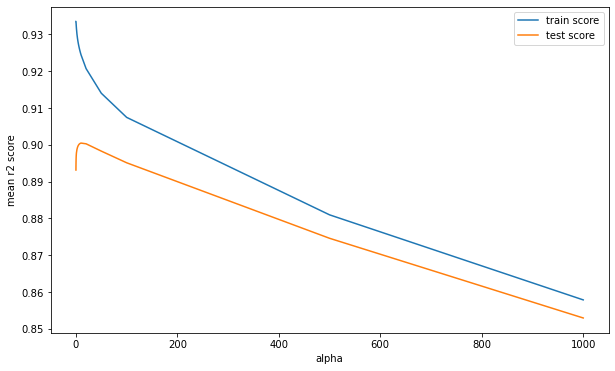

In [471]:
#plot of mean r2 vs lambda value
plt.figure(figsize=(10,6))

plt.plot(ridge_cv_res['param_alpha'],ridge_cv_res['mean_train_score'])
plt.plot(ridge_cv_res['param_alpha'],ridge_cv_res['mean_test_score'])
plt.legend(['train score','test score'])
plt.xlabel('alpha')
plt.ylabel('mean r2 score')
plt.show()

#### Insights:

From the graph it is clearly visible that as the alpha increases the r2_score will decrease and optimal value for alpha is 10 

In [472]:
# Fit Ridge Regression model for alpha = 10 (Optimal Lambda)
alpha = model_cv.best_params_["alpha"]
ridge =Ridge(alpha = alpha)
ridge.fit(xtrain,ytrain)
y_pred_train = pd.DataFrame(ridge.predict(xtrain),columns=["SalePrice"])
y_pred_test = pd.DataFrame(ridge.predict(xtest),columns=["SalePrice"])

ridgemetric = Resultmetric(y_pred_train,y_pred_test)

print("\n Ridge Intercept \n",ridge.intercept_)
print("\n Ridge Coefficients \n",ridge.coef_)

R2 Score train =  0.9227340934340781
R2 Score test =  0.8917076742999729
RMSE score train =  0.11018959182839998
RMSE score test =  0.13359617063069337

 Ridge Intercept 
 11.816404219554062

 Ridge Coefficients 
 [ 0.03046972  0.00340903  0.07440469  0.05175242  0.00229394  0.00487277
 -0.01739616 -0.00669188 -0.01150247  0.01208596 -0.01362297  0.05745219
 -0.00727514  0.0253998   0.03785139  0.08412461  0.02672899  0.01766733
  0.01623515  0.00335663 -0.00928229 -0.00370583  0.02568941 -0.00840779
  0.03404271  0.01328639  0.00917471  0.00317533 -0.00050908 -0.05928303
 -0.02256457  0.00689233  0.00052328  0.00847748 -0.01856578  0.00189009
 -0.03779311 -0.01519488 -0.02074738 -0.05619892 -0.00945963 -0.00102053
  0.02009885 -0.01082719  0.04528634  0.02058857 -0.01085776  0.06271837
  0.03930294  0.05669882  0.01535979  0.02571799 -0.02961336 -0.01090365
  0.0057452   0.00129759 -0.00631622  0.02695009  0.0452318  -0.01210733
  0.08253964 -0.07114506 -0.00471809 -0.05817907 -0.0443

##### Insights: 
 - With RidgeRegression, we are getting R2 score of test data as 89.17%  and for train data as 92.27% and are near to each other
 - Compare to Linear Regression RFE Model earlier, R2 value got increased

 - We are getting RMSE score for test set as 0.138 which means the variance in data is by 0.133 unit

In [473]:
#model coefficent & intercept
model_ridge_param = list(ridge.coef_)

model_ridge_param.insert(0,ridge.intercept_)
model_ridge_param = [i for i in model_ridge_param]

cols = xtrain.columns.values
ridge_param_list = list(zip(cols,model_ridge_param))
ridge_param_list

[('LotArea', 11.816404219554062),
 ('LotShape', 0.030469715582616602),
 ('OverallQual', 0.0034090287188002443),
 ('OverallCond', 0.07440469221719329),
 ('MasVnrArea', 0.051752423019612005),
 ('ExterQual', 0.0022939380784206364),
 ('BsmtQual', 0.004872772012231018),
 ('BsmtExposure', -0.017396160352120337),
 ('BsmtFinType1', -0.00669187672887703),
 ('BsmtFinSF1', -0.011502473632590103),
 ('BsmtUnfSF', 0.01208595540778758),
 ('TotalBsmtSF', -0.013622972614922737),
 ('HeatingQC', 0.05745218667956238),
 ('1stFlrSF', -0.007275136261405768),
 ('2ndFlrSF', 0.025399800342466968),
 ('GrLivArea', 0.037851389874457096),
 ('BsmtFullBath', 0.0841246147723416),
 ('FullBath', 0.0267289905181445),
 ('HalfBath', 0.017667328244596076),
 ('BedroomAbvGr', 0.016235148086633632),
 ('KitchenQual', 0.003356633715994008),
 ('TotRmsAbvGrd', -0.009282285306847753),
 ('Fireplaces', -0.003705834206892273),
 ('GarageFinish', 0.02568940940006422),
 ('GarageCars', -0.008407790131708448),
 ('GarageArea', 0.03404270571

#### Top 10 Features of Ridge Regression


In [474]:
ridge_params_df = pd.DataFrame({'Params':cols,'Coef':ridge.coef_})
(ridge_params_df.sort_values('Coef',ascending=False)).head(11)

Params      Coef
15             GrLivArea  0.084125
60  Neighborhood_Crawfor  0.082540
2            OverallQual  0.074405
97   Exterior1st_BrkFace  0.066271
70  Neighborhood_NridgHt  0.064637
75  Neighborhood_Somerst  0.063677
47           MSZoning_FV  0.062718
76  Neighborhood_StoneBr  0.057854
11           TotalBsmtSF  0.057452
49           MSZoning_RL  0.056699
3            OverallCond  0.051752

#### Residual Analysis Ridge Regression

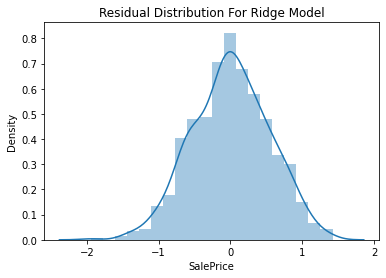

In [475]:
res = ytrain - y_pred_train['SalePrice']
sb.distplot(res,bins=20)
plt.title('Residual Distribution For Ridge Model')
plt.show()

##### Insight:
 - Data is normally distributed

### Lasso Regression

#### Optimal Lambda Value

In [476]:
#Perform cross validation for different value of alpha

lasso =Lasso()

param_value = {"alpha":[0.0001,0.0002,0.0003,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,
                   1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,20,50,100,500,1000]}
folds=5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = param_value , 
                        scoring = "r2", 
                        cv = folds, 
                        verbose = 1, 
                        return_train_score = True)
model_cv.fit(xtrain,ytrain)
print(model_cv.best_params_)

#checking the value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
{'alpha': 0.0002}
{'alpha': 0.0002}
0.9002145161059685


In [477]:
# Fit Lasso Regression model for alpha = 0.0002 - Optimal Lambda value
alpha = model_cv.best_params_["alpha"]
lasso =Lasso(alpha = alpha)
lasso.fit(xtrain,ytrain)
print("\n Lasso Coef \n",lasso.coef_)


 Lasso Coef 
 [ 2.89664394e-02  4.08702612e-03  6.84174036e-02  5.03927134e-02
  3.31891375e-04  4.12740009e-03 -1.58577201e-02 -7.00181390e-03
 -1.01937958e-02  1.31421246e-02 -1.36186495e-02  5.98778173e-02
 -5.57373832e-03  1.14227366e-02  3.16709545e-02  9.93746046e-02
  2.49740664e-02  1.50062634e-02  1.43898438e-02  1.25523613e-03
 -9.78085667e-03 -3.80911215e-03  2.43985680e-02 -8.41495995e-03
  3.69368220e-02  1.10590420e-02  9.18995597e-03  2.64754816e-03
 -3.53046272e-04 -5.61515451e-02 -2.30812446e-02  5.99421293e-03
 -0.00000000e+00  0.00000000e+00 -2.66669450e-02 -0.00000000e+00
 -3.49382835e-02 -0.00000000e+00 -3.49445011e-02 -7.77423992e-02
 -0.00000000e+00 -0.00000000e+00  1.58287812e-02 -0.00000000e+00
  4.58191449e-02  5.79114861e-03 -0.00000000e+00  2.36808501e-01
  2.21512411e-01  2.25533809e-01  1.83862745e-01  2.56681864e-02
 -3.11868707e-02 -0.00000000e+00  3.53970184e-03  0.00000000e+00
  0.00000000e+00  2.99281281e-02  5.85358878e-02 -4.94215106e-04
  1.077075

#### Predict ytrain and ytest

In [478]:

y_lasso_pred_train = pd.DataFrame(lasso.predict(xtrain),columns=["SalePrice"])
y_lasso_pred_test = pd.DataFrame(lasso.predict(xtest),columns=["SalePrice"])

lassometric = Resultmetric(y_lasso_pred_train,y_lasso_pred_test)

R2 Score train =  0.9264938360791735
R2 Score test =  0.8945034519512849
RMSE score train =  0.10747525925509806
RMSE score test =  0.13186037122520552


##### Insights:
 - With LassoRegression, we are getting R2 score of test data as 89.45%  and for train data as 92.64% and are near to each other
 - Compare to Linear Regression (RFE) Model earlier, R2 value got increased. In compare to Ridge Regression, there is very minimal increase in R2.

 - We are getting RMSE score for test set as 0.131 which means the variance in data is by 0.131 unit
 - We can notice that the coefficients for features which are not required is set to 0 for many features

In [479]:
#model coefficent & intercept
model_lasso_param = list(lasso.coef_)

model_lasso_param.insert(0,lasso.intercept_)
model_lasso_param = [i for i in model_lasso_param]

cols = xtrain.columns.values
lasso_param_list = list(zip(cols,model_lasso_param))
lasso_param_list

[('LotArea', 11.665369085590754),
 ('LotShape', 0.02896643942488375),
 ('OverallQual', 0.004087026120270053),
 ('OverallCond', 0.06841740356208269),
 ('MasVnrArea', 0.05039271339089274),
 ('ExterQual', 0.0003318913754169514),
 ('BsmtQual', 0.004127400085894162),
 ('BsmtExposure', -0.015857720079117302),
 ('BsmtFinType1', -0.007001813896115115),
 ('BsmtFinSF1', -0.010193795819085614),
 ('BsmtUnfSF', 0.013142124565632442),
 ('TotalBsmtSF', -0.013618649460918796),
 ('HeatingQC', 0.059877817274234045),
 ('1stFlrSF', -0.005573738324787153),
 ('2ndFlrSF', 0.011422736645414036),
 ('GrLivArea', 0.031670954474627214),
 ('BsmtFullBath', 0.09937460455002618),
 ('FullBath', 0.024974066351416774),
 ('HalfBath', 0.015006263359548834),
 ('BedroomAbvGr', 0.014389843764841122),
 ('KitchenQual', 0.0012552361255512906),
 ('TotRmsAbvGrd', -0.009780856673145466),
 ('Fireplaces', -0.003809112146530311),
 ('GarageFinish', 0.02439856804865616),
 ('GarageCars', -0.008414959947716696),
 ('GarageArea', 0.0369368

In [480]:
# List of Top 10 Lasso Regression Coeffiecints

lasso_params_df = pd.DataFrame({'Params':cols,'Coef':lasso.coef_})
(lasso_params_df.sort_values('Coef',ascending=False)).head(11)

Params      Coef
47           MSZoning_FV  0.236809
49           MSZoning_RL  0.225534
48           MSZoning_RH  0.221512
50           MSZoning_RM  0.183863
60  Neighborhood_Crawfor  0.107708
76  Neighborhood_StoneBr  0.105206
15             GrLivArea  0.099375
70  Neighborhood_NridgHt  0.096258
97   Exterior1st_BrkFace  0.089215
75  Neighborhood_Somerst  0.084379
69  Neighborhood_NoRidge  0.077414

In [481]:
#result of cross validation
lasso_cv_res = pd.DataFrame(model_cv.cv_results_)
lasso_cv_res['param_alpha'] = lasso_cv_res['param_alpha'].astype('float32')
lasso_cv_res.head(5)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_alpha  \
0       0.015255      0.003130         0.001657    5.423143e-04       0.0001   
1       0.011753      0.001387         0.002000    4.909339e-07       0.0002   
2       0.011457      0.001597         0.002117    1.557238e-04       0.0003   
3       0.012139      0.004826         0.003247    1.570044e-03       0.0010   
4       0.005246      0.000989         0.002299    3.860911e-04       0.0100   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}           0.910645           0.875635           0.870404   
1  {'alpha': 0.0002}           0.912654           0.875794           0.866672   
2  {'alpha': 0.0003}           0.914060           0.875481           0.862959   
3   {'alpha': 0.001}           0.916201           0.869778           0.864266   
4    {'alpha': 0.01}           0.907612           0.856036           0.851619   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0           0.918101           0.922711         0.899499        0.022023   
1           0.921612           0.924341         0.900215        0.024150   
2           0.921580           0.923647         0.899545        0.025278   
3           0.920680           0.918316         0.897848        0.025269   
4           0.908485           0.900498         0.884850        0.025519   

   rank_test_score  split0_train_score  split1_train_score  \
0                3            0.930138            0.937549   
1                1            0.928132            0.935253   
2                2            0.925879            0.933026   
3                4            0.914414            0.922105   
4                5            0.885713            0.897877   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.937313            0.927805            0.926687   
1            0.935292            0.925457            0.924033   
2            0.933019            0.923084            0.921475   
3            0.924815            0.913240            0.911372   
4            0.897839            0.884368            0.883768   

   mean_train_score  std_train_score  
0          0.931899         0.004653  
1          0.929633         0.004789  
2          0.927297         0.004883  
3          0.917189         0.005281  
4          0.889913         0.006518

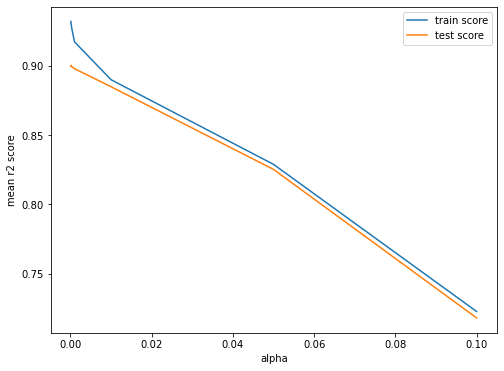

In [482]:
#plot graph for train /test score vs mean r2 score around optimal lambda 0.0002
plt.figure(figsize=(8,6))
plt.plot(lasso_cv_res[lasso_cv_res['param_alpha']<=0.1]['param_alpha'],lasso_cv_res[lasso_cv_res['param_alpha']<=0.1]['mean_train_score'])
plt.plot(lasso_cv_res[lasso_cv_res['param_alpha']<=0.1]['param_alpha'],lasso_cv_res[lasso_cv_res['param_alpha']<=0.1]['mean_test_score'])

plt.legend(['train score','test score'])
plt.xlabel('alpha')
plt.ylabel('mean r2 score')
plt.show()

##### Insights:
From the graph it is clearly visible that as the alpha increases the r2_score will decrease and optimal value for alpha is .0002

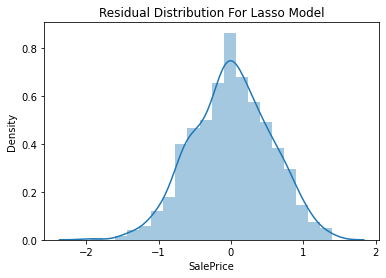

In [483]:
res = ytrain - y_lasso_pred_train['SalePrice']
sb.distplot(res,bins=20)
plt.title('Residual Distribution For Lasso Model')
plt.show()

##### Insight:
Error terms are normally distributed and model seems to be fine

## Solution for QA as part of this assignment
#### What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? <br>
#### What will be the most important predictor variables after the change is implemented?

#### Ridge Regression with Double the Alpha Value

In [484]:
# Fit Ridge Regression model for alpha = 20 (Double the optimal value)
alpha_r_db = 20
ridge_db =Ridge(alpha = alpha_r_db)
ridge_db.fit(xtrain,ytrain)
y_ridge_db_pred_train = pd.DataFrame(ridge_db.predict(xtrain),columns=["SalePrice"])
y_ridge_db_pred_test = pd.DataFrame(ridge_db.predict(xtest),columns=["SalePrice"])

ridgemetric_db = Resultmetric(y_ridge_db_pred_train,y_ridge_db_pred_test)


R2 Score train =  0.919564042653131
R2 Score test =  0.8912715921096453
RMSE score train =  0.11242728929067104
RMSE score test =  0.13386488947779246


In [485]:
ridge_db_params_df = pd.DataFrame({'Params':cols,'Coef':ridge_db.coef_})
(ridge_db_params_df.sort_values('Coef',ascending=False)).head(11)

Params      Coef
15               GrLivArea  0.078987
2              OverallQual  0.077281
60    Neighborhood_Crawfor  0.066905
11             TotalBsmtSF  0.054827
3              OverallCond  0.051468
75    Neighborhood_Somerst  0.050939
97     Exterior1st_BrkFace  0.050807
70    Neighborhood_NridgHt  0.047474
47             MSZoning_FV  0.044708
141  SaleCondition_Partial  0.041179
140   SaleCondition_Normal  0.040688

#### Lasso Regression with Double the Alpha Value

In [486]:
# Double for alpha value to 0.0004
alpha_db = 0.0004
lasso_db =Lasso(alpha = alpha_db)
lasso_db.fit(xtrain,ytrain)
y_lasso_db_pred_train = pd.DataFrame(lasso_db.predict(xtrain),columns=["SalePrice"])
y_lasso_db_pred_test = pd.DataFrame(lasso_db.predict(xtest),columns=["SalePrice"])
lassometric_db = Resultmetric(y_lasso_db_pred_train,y_lasso_db_pred_test)

R2 Score train =  0.9219561998296856
R2 Score test =  0.8937399944187877
RMSE score train =  0.11074288318669148
RMSE score test =  0.1323366347606043


In [487]:
# List of Top 10 Lasso Regression Coeffiecints with dobule the alpha (0.0004)

lasso_db_params_df = pd.DataFrame({'Params':cols,'Coef':lasso_db.coef_})
(lasso_db_params_df.sort_values('Coef',ascending=False)).head(11)

Params      Coef
15             GrLivArea  0.102074
60  Neighborhood_Crawfor  0.099553
97   Exterior1st_BrkFace  0.088063
47           MSZoning_FV  0.083078
70  Neighborhood_NridgHt  0.080935
75  Neighborhood_Somerst  0.080603
49           MSZoning_RL  0.078364
76  Neighborhood_StoneBr  0.077625
2            OverallQual  0.074078
69  Neighborhood_NoRidge  0.065654
58  Neighborhood_ClearCr  0.058840

In [488]:
# Compare the different metrics for Linear Regression, Ridge Regression (both Alpha and dobule Alpha) and Lassoregression (both Alpha and dobule Alpha) 
metric_column = pd.Series(["R2 Score (train)","R2 Score (test)","RMSE (train)","RMSE (test)"], name = "Metric")
Linear_Metric = pd.Series(LinearRegMetric, name = "LinearRegression")
ridge_metric = pd.Series(ridgemetric, name = "RidgeRegression")
lasso_metric = pd.Series(lassometric, name = "LassoRegression")
ridge_metric_db = pd.Series(ridgemetric_db, name = "RidgeRegression_Double_Alpha")
lasso_metric_db = pd.Series(lassometric_db, name = "LassoRegression_Double_Alpha")

finalmetric = pd.concat([metric_column,Linear_Metric,ridge_metric,ridge_metric_db,lasso_metric,lasso_metric_db], axis = 1)
finalmetric

Metric  LinearRegression  RidgeRegression  \
0  R2 Score (train)          0.852030         0.922734   
1   R2 Score (test)          0.813680         0.891708   
2      RMSE (train)          0.152487         0.110190   
3       RMSE (test)          0.175236         0.133596   

   RidgeRegression_Double_Alpha  LassoRegression  LassoRegression_Double_Alpha  
0                      0.919564         0.926494                      0.921956  
1                      0.891272         0.894503                      0.893740  
2                      0.112427         0.107475                      0.110743  
3                      0.133865         0.131860                      0.132337

#### Q3: After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [489]:
#Below are the first 5 important variables as per Lasso model with given data and droping the same
#'MSZoning_FV','MSZoning_RL','MSZoning_RH','MSZoning_RM','Neighborhood_Crawfor'
xtrain_new_ds = xtrain.drop(columns=['MSZoning_FV','MSZoning_RL','MSZoning_RH','MSZoning_RM','Neighborhood_Crawfor'],axis=1)

In [490]:
#Perform cross validation with new data set

lasso =Lasso()

param_value = {"alpha":[0.0001,0.0002,0.0003,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,
                   1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,20,50,100,500,1000]}
folds=5
model_cv_nds = GridSearchCV(estimator = lasso, 
                        param_grid = param_value , 
                        scoring = "r2", 
                        cv = folds, 
                        verbose = 1, 
                        return_train_score = True)
model_cv_nds.fit(xtrain_new_ds,ytrain)
print(model_cv_nds.best_params_)

#checking the value of optimum number of parameters
print(model_cv_nds.best_params_)
print(model_cv_nds.best_score_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
{'alpha': 0.0003}
{'alpha': 0.0003}
0.8967671169632018


In [491]:
# Fit Lasso Regression model for alpha = 0.0003 - Optimal Lambda value
#alpha_nds = model_cv_nds.best_params_["alpha"]
lasso_nds =Lasso(alpha = 0.0003)
lasso_nds.fit(xtrain_new_ds,ytrain)

Lasso(alpha=0.0003)

In [492]:
model_nds_lasso_param = list(lasso_nds.coef_)

model_nds_lasso_param.insert(0,lasso_nds.intercept_)
model_nds_lasso_param = [i for i in model_nds_lasso_param]

cols = xtrain_new_ds.columns.values
lasso_nds_param_list = list(zip(cols,model_nds_lasso_param))
lasso_nds_param_list

[('LotArea', 11.906935268583878),
 ('LotShape', 0.033183565142228866),
 ('OverallQual', 0.0024343894158141413),
 ('OverallCond', 0.07092984427159013),
 ('MasVnrArea', 0.054255044817872744),
 ('ExterQual', 0.0013306995856010744),
 ('BsmtQual', 0.004694598082864945),
 ('BsmtExposure', -0.016934439644397926),
 ('BsmtFinType1', -0.005592737156450564),
 ('BsmtFinSF1', -0.011330098364772348),
 ('BsmtUnfSF', 0.011954179477968714),
 ('TotalBsmtSF', -0.014747200731697696),
 ('HeatingQC', 0.05813817408763098),
 ('1stFlrSF', -0.007158623341104112),
 ('2ndFlrSF', 0.016729303662807123),
 ('GrLivArea', 0.031074434837350076),
 ('BsmtFullBath', 0.0965717550676061),
 ('FullBath', 0.02442915038774622),
 ('HalfBath', 0.017015838545269092),
 ('BedroomAbvGr', 0.016039723487439938),
 ('KitchenQual', 0.0007927502146878276),
 ('TotRmsAbvGrd', -0.009259253740666362),
 ('Fireplaces', -0.0036657626133595107),
 ('GarageFinish', 0.028368384648714426),
 ('GarageCars', -0.006543475544096977),
 ('GarageArea', 0.03338

In [493]:
# List of Top 5 Lasso Regression Coeffiecints with new dataset

lasso_nds_params_df = pd.DataFrame({'Params':cols,'Coef':lasso_nds.coef_})
(lasso_nds_params_df.sort_values('Coef',ascending=False)).head(6)

Params      Coef
92   Exterior1st_BrkFace  0.098240
15             GrLivArea  0.096572
71  Neighborhood_StoneBr  0.090722
70  Neighborhood_Somerst  0.088600
65  Neighborhood_NridgHt  0.082192
2            OverallQual  0.070930

## Final Conclusion

In [494]:
# Compare the different metrics for Linear Regression, Ridge Regression and Lassoregression
metric_column = pd.Series(["R2 Score (train)","R2 Score (test)","RMSE (train)","RMSE (test)"], name = "Metric")
Linear_Metric = pd.Series(LinearRegMetric, name = "LinearRegression")
ridge_metric = pd.Series(ridgemetric, name = "RidgeRegression")
lasso_metric = pd.Series(lassometric, name = "LassoRegression")

finalmetric = pd.concat([metric_column,Linear_Metric,ridge_metric,lasso_metric], axis = 1)
finalmetric

Metric  LinearRegression  RidgeRegression  LassoRegression
0  R2 Score (train)          0.852030         0.922734         0.926494
1   R2 Score (test)          0.813680         0.891708         0.894503
2      RMSE (train)          0.152487         0.110190         0.107475
3       RMSE (test)          0.175236         0.133596         0.131860

##### Linear Regression (RFE)
  - R2 Score Train : 85.2% 
  - R2 Test Score : 81.36% 
  - RMSE test is 0.175
  
##### Ridge Regression 
  - Optimal lambda value : 10
  - R2 Score Train : 92.27% 
  - R2 Test Score : 89.17% 
  - RMSE test is 0.133
  - Important 10 Features and Ridge Regression Co-efficients
        - GrLivArea 	0.084125
        - Neighborhood_Crawfor 	0.082540
        - OverallQual 	0.074405
        - Exterior1st_BrkFace 	0.066271
        - Neighborhood_NridgHt 	0.064637
        - Neighborhood_Somerst 	0.063677
        - MSZoning_FV 	0.062718
        - Neighborhood_StoneBr 	0.057854
        - TotalBsmtSF 	0.057452
        - MSZoning_RL 	0.056699
        - OverallCond 	0.051752


##### Lasso Regression 
  - Optimal lambda value : .0002 
  - R2 Score Train : 92.64% 
  - R2 Test Score : 89.45% 
  - RMSE test is 0.131
  - Important 10 Features and Lasso Regression Co-efficients
        - MSZoning_FV 	0.236809
        - MSZoning_RL 	0.225534
        - MSZoning_RH 	0.221512
        - MSZoning_RM 	0.183863
        - Neighborhood_Crawfor 	0.107708
        - Neighborhood_StoneBr 	0.105206
        - GrLivArea 	0.099375
        - Neighborhood_NridgHt 	0.096258
        - Exterior1st_BrkFace 	0.089215
        - Neighborhood_Somerst 	0.084379
        - Neighborhood_NoRidge 	0.077414

### Results: 
 - Linear Regression (RFE) model has low R2 value in compared to Ridge Regression and Lasso Regression models.
 - In-comparison to Ridge Regression, Lasso Regression model has minimal increase in R2 and can say Lasso Regression model is slightly better in compared to Ridge Regression.
 - Finally, we can consider Lasso Regression Model for housing Sales Prize prediction
 - As per Lasso, top recommended features are as below
        - MSZoning_FV
        - MSZoning_RL
        - MSZoning_RH
        - MSZoning_RM
        - Neighborhood_Crawfor
        - Neighborhood_StoneBr
        - GrLivArea
        - Neighborhood_NridgHt
        - Exterior1st_BrkFace
        - Neighborhood_Somerst
        - Neighborhood_NoRidge